# Strategie ewolucyjne

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

# Przykładowe problemy testowe

In [5]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [33]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [43]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    res = - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)
    for i in range(X.shape[0]):
        if (X[i, :] < -500).any() or (X[i, :] > 500).any():
            res[i] = -100000
    return res

In [8]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [9]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [10]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

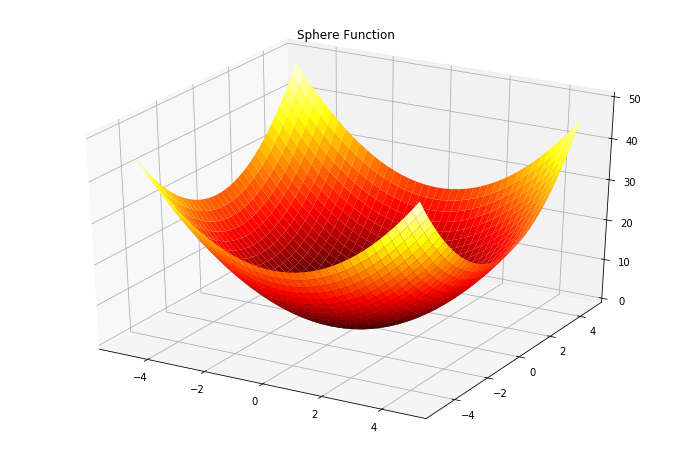

In [11]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

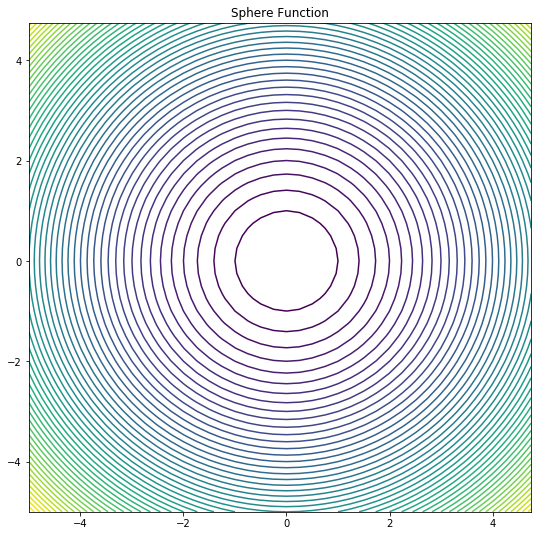

In [15]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

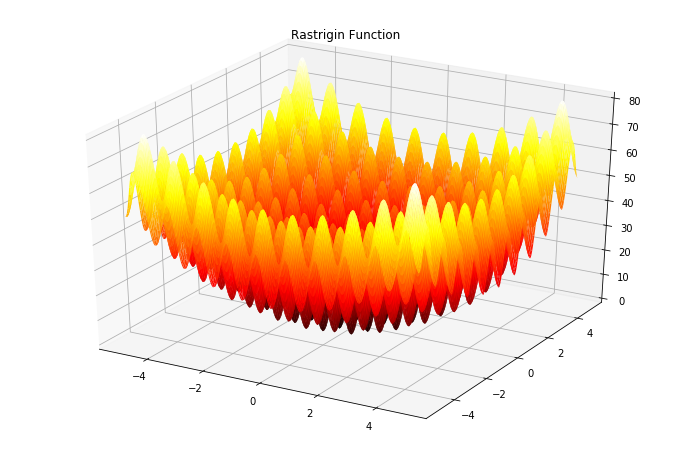

In [12]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

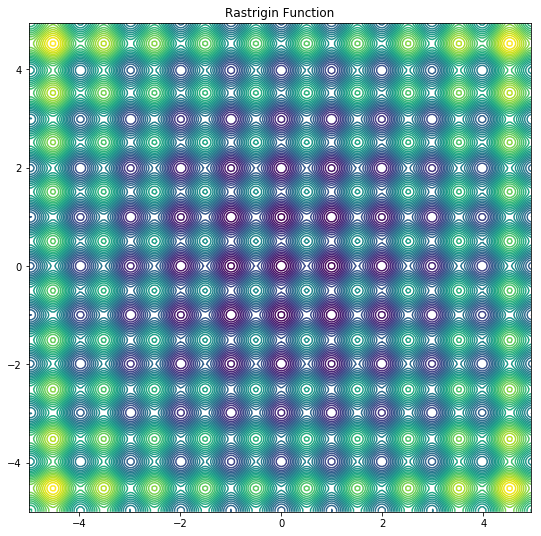

In [14]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

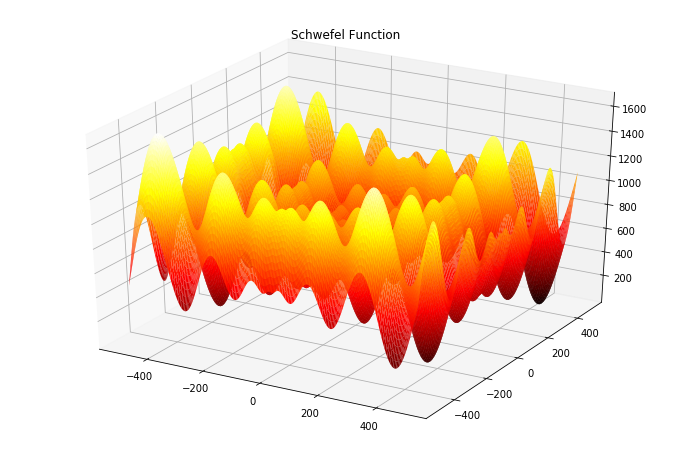

In [16]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

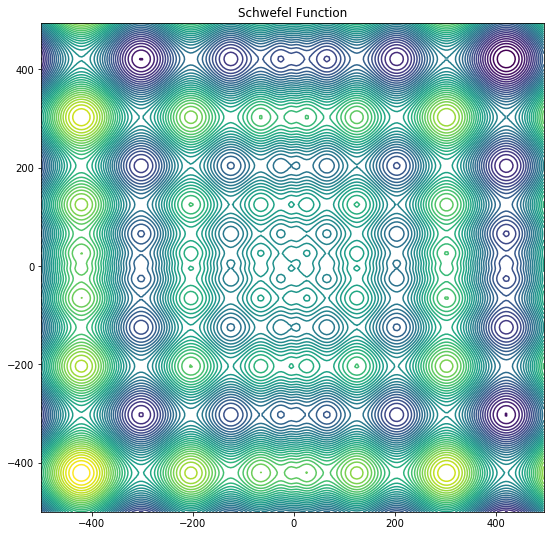

In [18]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

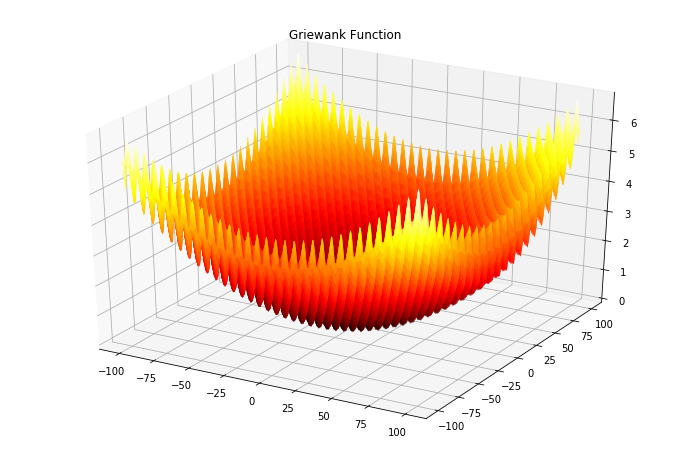

In [19]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

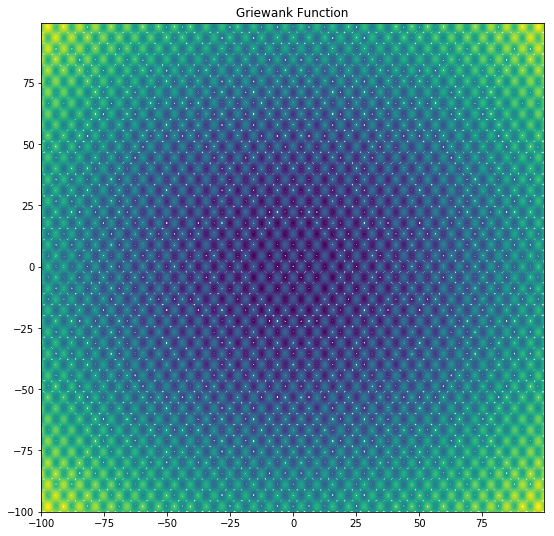

In [20]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

# Przykładowe modele mutacji

In [440]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

In [441]:
from matplotlib.patches import Ellipse

def mutation_quality_check(N, T, mutator, objective_function):
    betters = np.zeros(T)
    bests = np.zeros(T)
    for t in range(T):
        mutated = mutator(N)
        values = objective_function(mutated)
        betters[t] = (values > objective_function(original_individual)[0]).sum().astype(float) * 100 / N
        bests[t] = values.max()
    plt.figure(figsize=(16, 4))
    plt.hist(betters, bins=10)
    plt.title("Percentage of better individuals")
    plt.show()
    print "Original value : ", objective_function(original_individual)[0]
    plt.figure(figsize=(16, 4))
    plt.xlim( ( min(-3, bests.min()) , 0))
    plt.hist(bests, bins=10)
    plt.title("Value of best individual")
    plt.show()
    
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]


### 95% confidence computed according to this site
### https://www1.udel.edu/biology/rosewc/kaap686/reserve/cop/center%20of%20position%20conf95.pdf
def mutation_ellipse(mutator, cov, title):
    mutations = mutator(N)
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, aspect='equal')
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    
    vals, vecs = eigsorted(cov)
    e0 = vecs[0]
    e1 = vecs[1]
    sigma0 = np.sqrt(vals[0])
    sigma1 = np.sqrt(vals[1])
    ax0 = np.sqrt(5.991)*sigma0 * e0
    ax1 = np.sqrt(5.991)*sigma1 * e1
    
    w = np.linalg.norm(ax0) * 2
    h = np.linalg.norm(ax1) * 2
    
    theta = -np.degrees( np.arctan(e1[1]/e1[0]))
    print "Ellipse axis ", w, h
    
    ell = Ellipse(xy=(1, 1),
              width=h, height=w,
              angle=theta, color='black', linewidth=3)
    ell.set_facecolor('none')
    ax.add_artist(ell)  
    
    ax.plot(mutations[:, 0], mutations[:, 1], 'ro')
    ax.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    plt.show()

def mutation_draw(mutator, title):
    mutations = mutator(N)
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    plt.figure(figsize=(9, 9))
    plt.contour(X, Y, Z, 50)
    plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
    plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    plt.title(title)
    plt.show()

    
    
def mutator1(N):
    return original_individual + sigma * np.random.randn(N, 2)

def mutator2(N):
    return original_individual + np.dot(np.random.randn(N, 2), np.linalg.cholesky(S).T)

## Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaÅ› $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

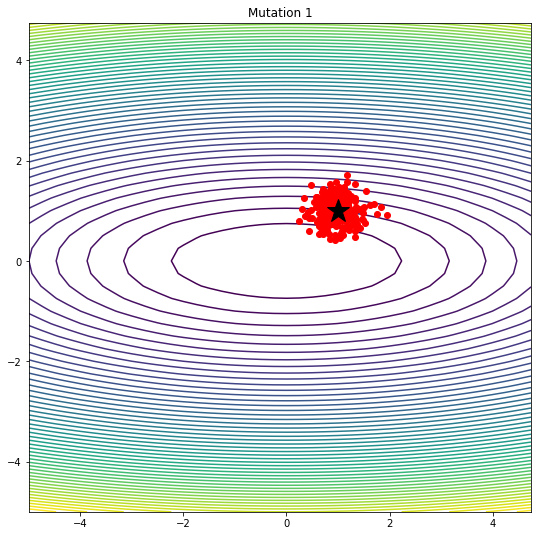

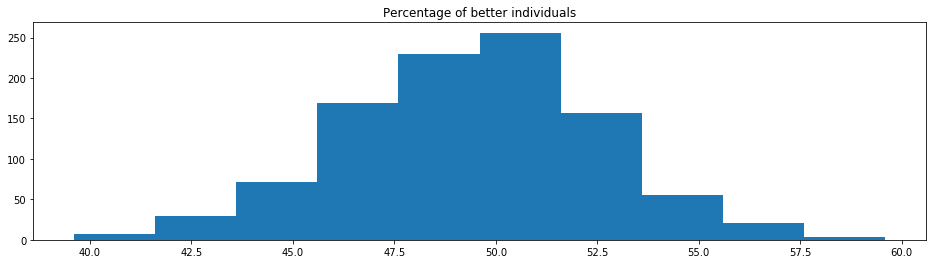

Original value :  -10


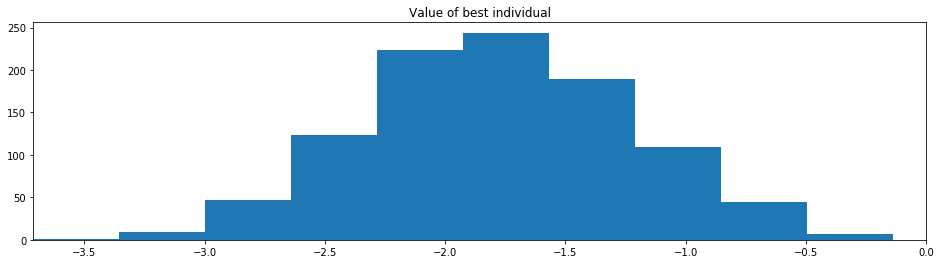

Ellipse axis  1.22382596802 1.22382596802


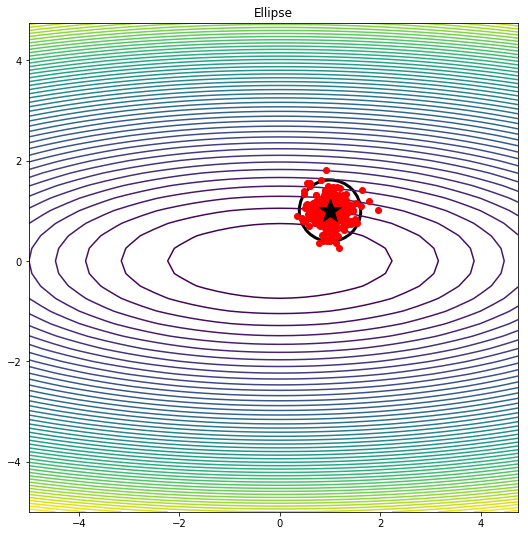

In [442]:
sigma = 0.25
mutation_draw(mutator1, "Mutation 1")
mutation_quality_check(N, 1000, mutator1, objective_function)
mutation_ellipse(mutator1, np.array([[sigma *sigma, 0.], [0., sigma*sigma]]), "Ellipse")

## Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \dots, d$

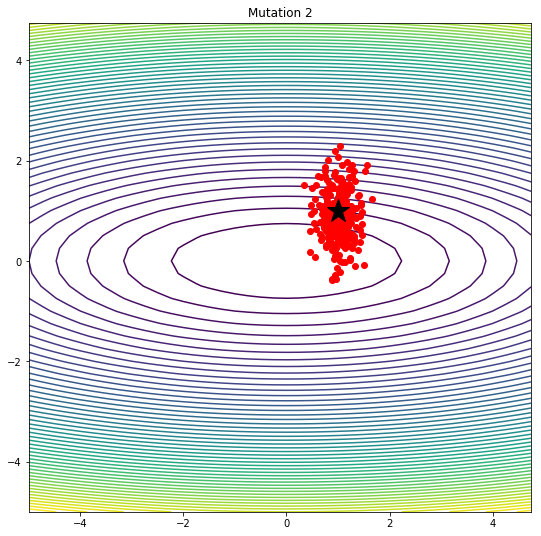

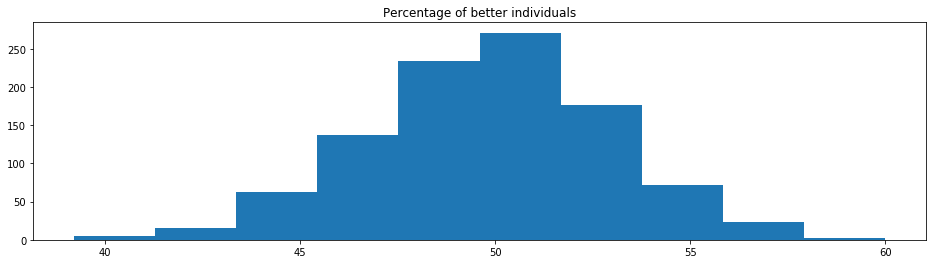

Original value :  -10


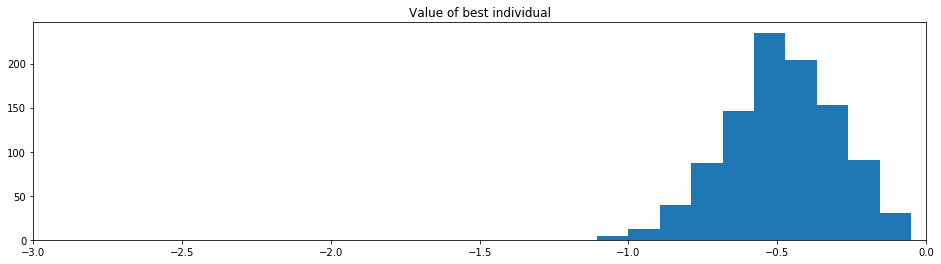

Ellipse axis  2.44765193604 1.22382596802


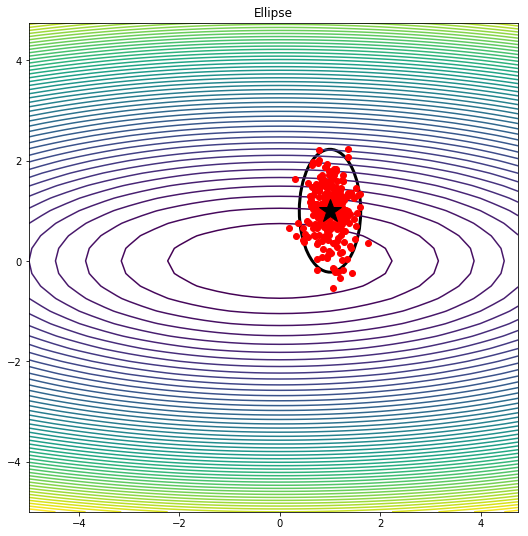

In [443]:
sigma = np.array([0.25, 0.5])
mutation_draw(mutator1, "Mutation 2")
mutation_quality_check(N, 1000, mutator1, objective_function)
mutation_ellipse(mutator1, np.array([[sigma[0] ** 2, 0.], [0., sigma[1] ** 2]]), "Ellipse")

## Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

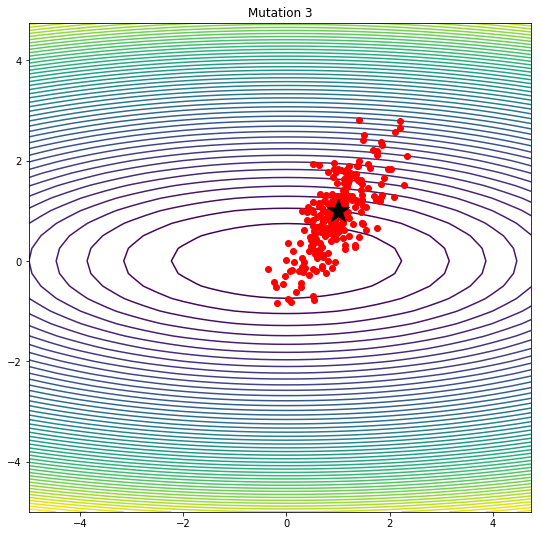

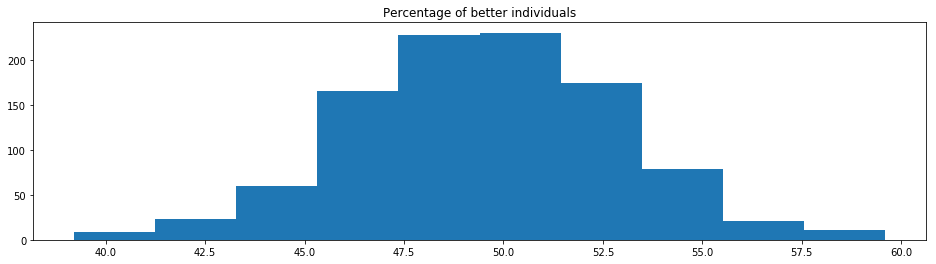

Original value :  -10


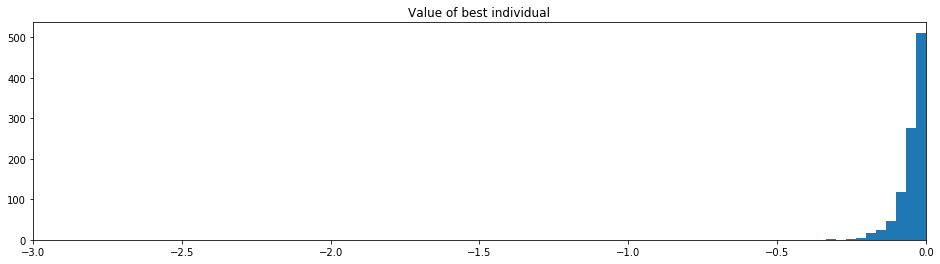

Ellipse axis  3.96038402514 1.5127320891


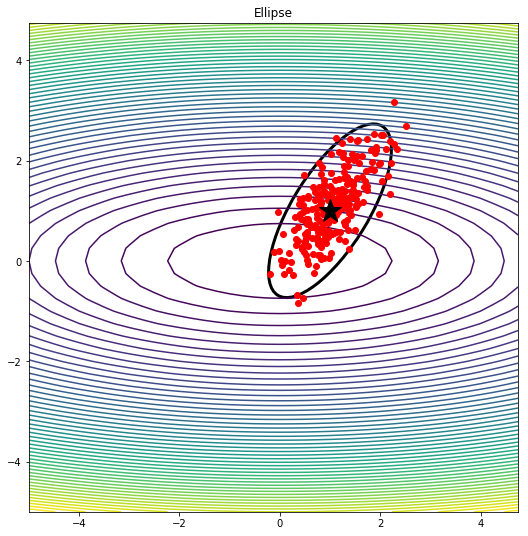

In [444]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutation_draw(mutator2, "Mutation 3")
mutation_quality_check(N, 1000, mutator2, objective_function)
mutation_ellipse(mutator2, S, "Ellipse")

### Other objective functions

In [227]:
N = 1000
d = 2

objective_function = objective_function_F1b

original_individual = np.array([[1, 1]])

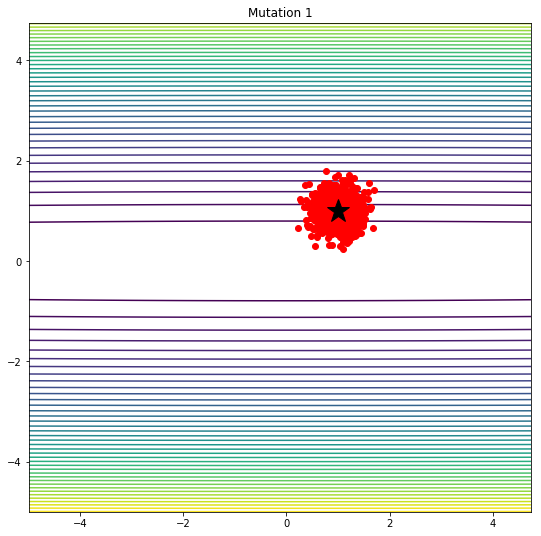

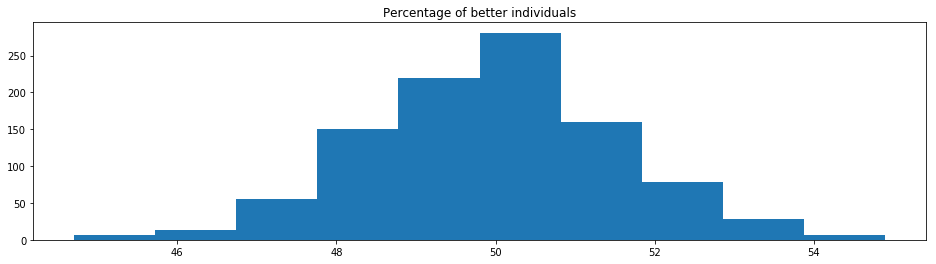

Original value :  -626


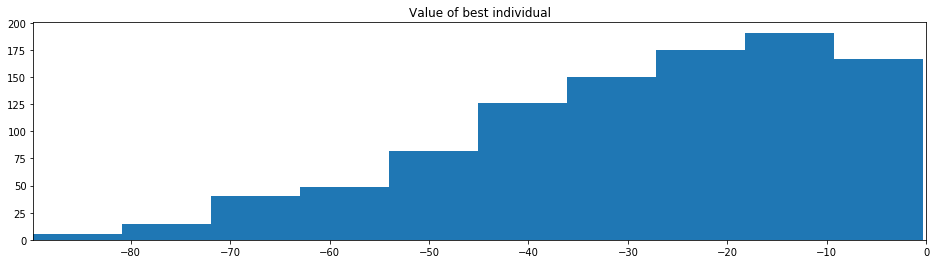

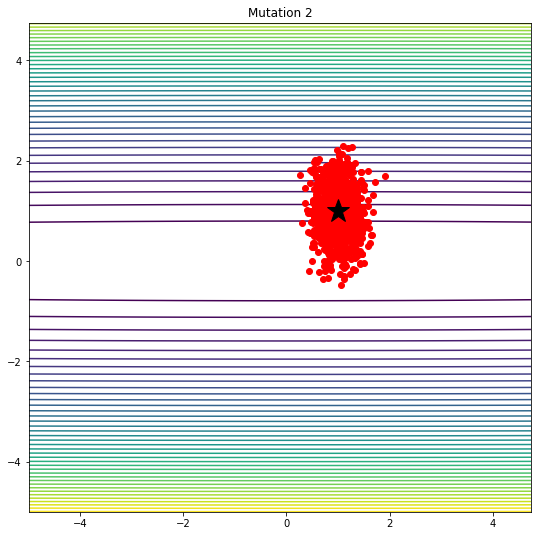

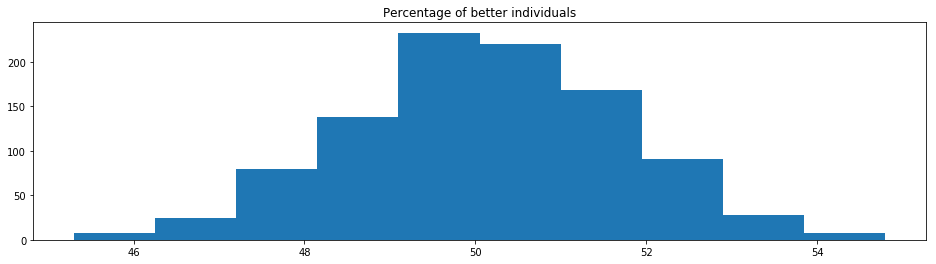

Original value :  -626


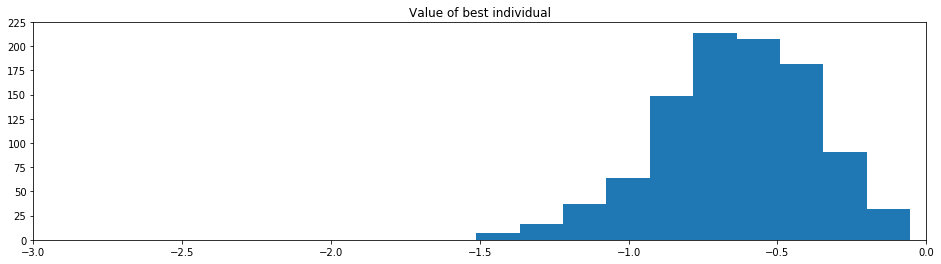

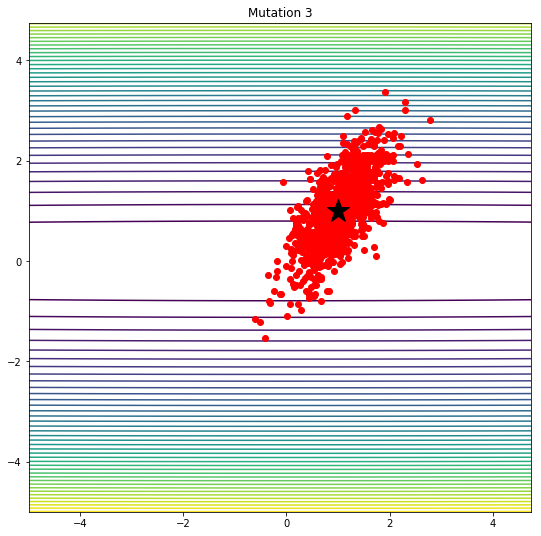

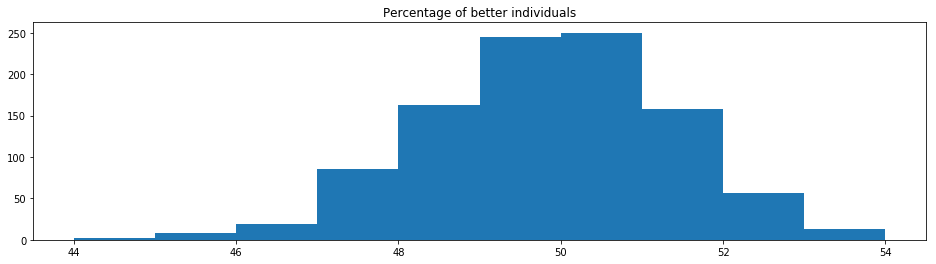

Original value :  -626


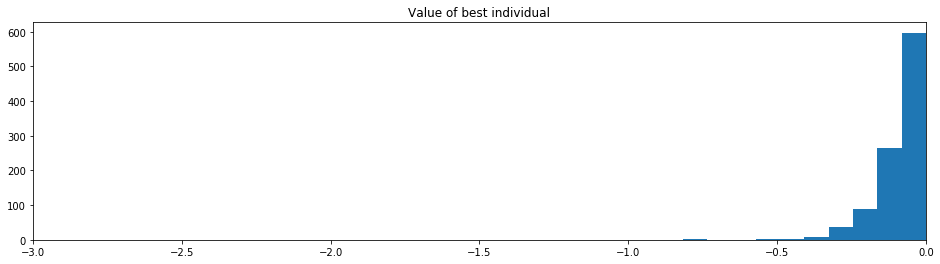

In [228]:
sigma = 0.25
mutation_draw(mutator1, "Mutation 1")
mutation_quality_check(N, 1000, mutator1, objective_function)
sigma = np.array([0.25, 0.5])
mutation_draw(mutator1, "Mutation 2")
mutation_quality_check(N, 1000, mutator1, objective_function)
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutation_draw(mutator2, "Mutation 3")
mutation_quality_check(N, 1000, mutator2, objective_function)

In [231]:
N = 1000
d = 2

objective_function = objective_function_F1c

original_individual = np.array([[1, 1]])

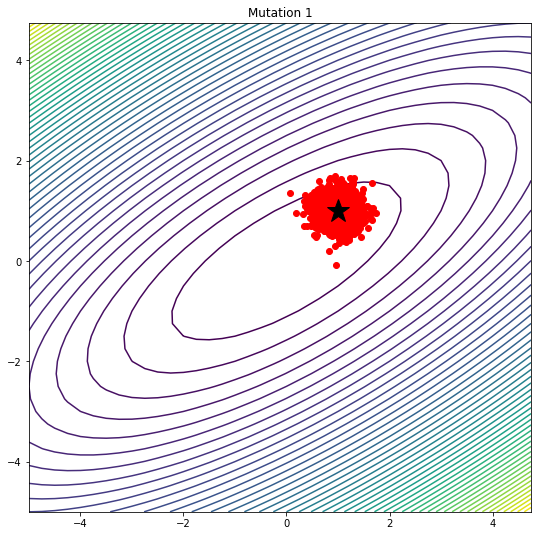

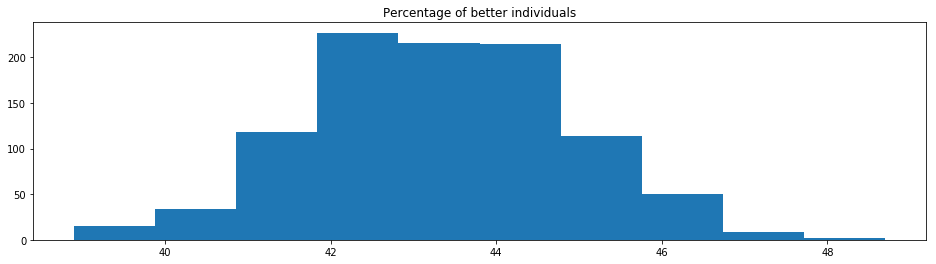

Original value :  -1


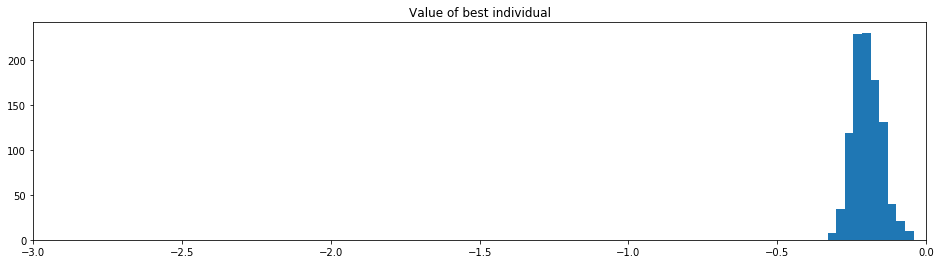

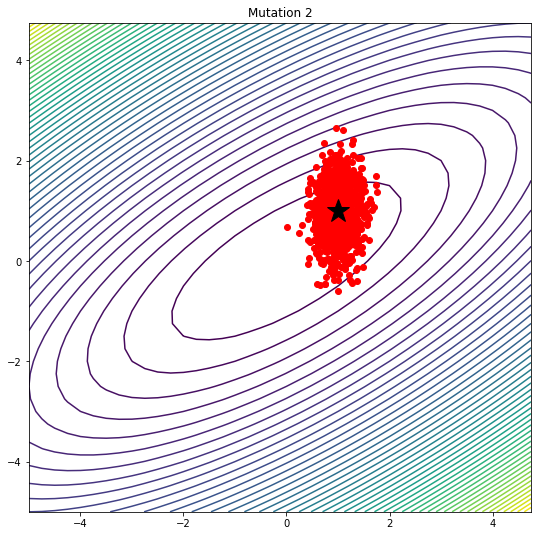

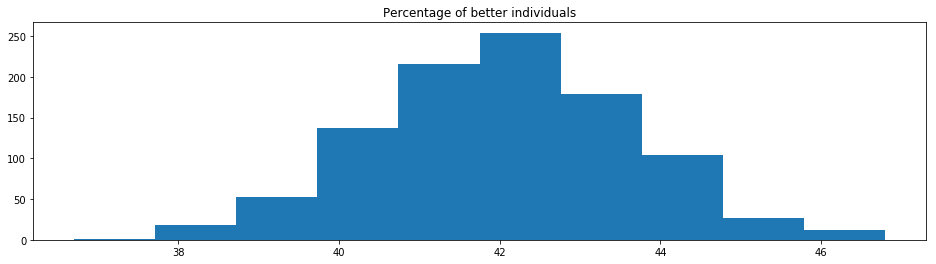

Original value :  -1


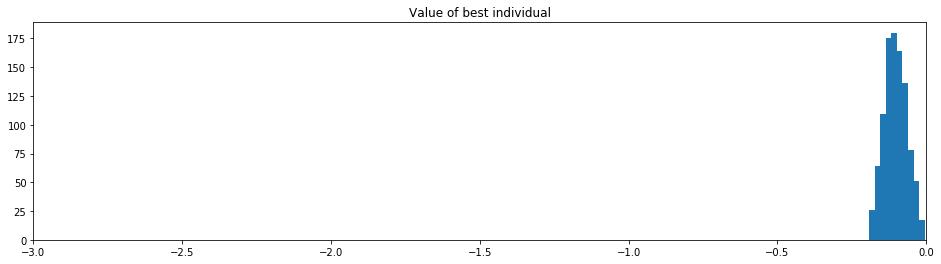

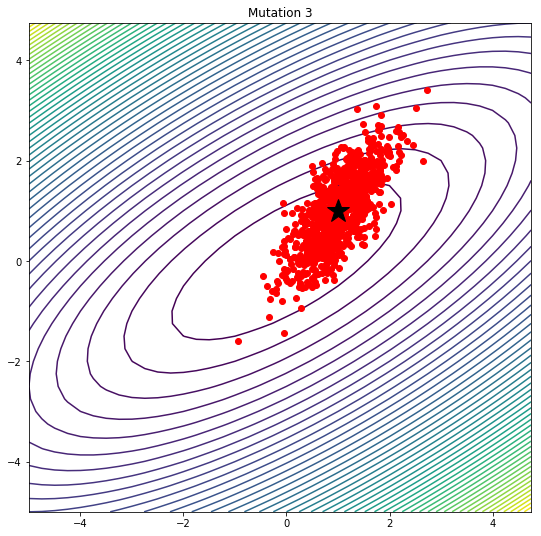

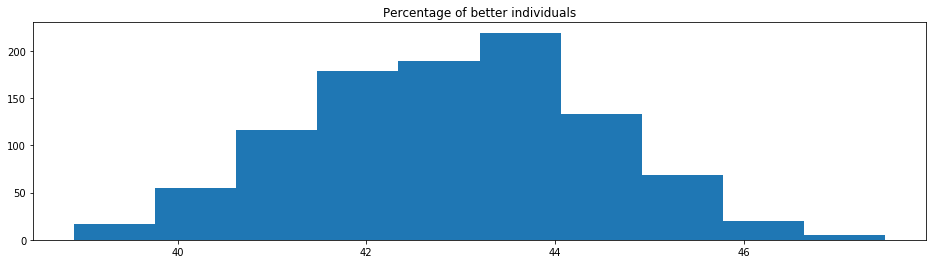

Original value :  -1


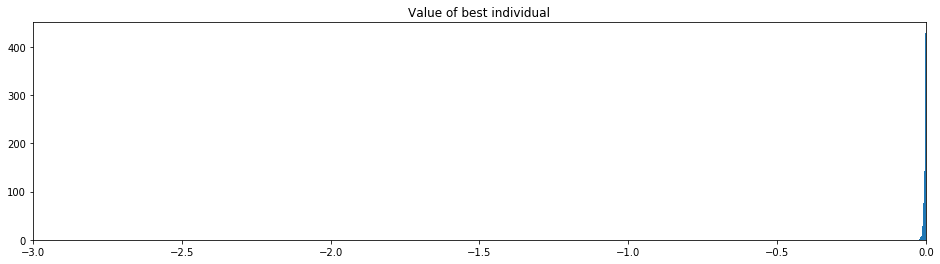

In [232]:
sigma = 0.25
mutation_draw(mutator1, "Mutation 1")
mutation_quality_check(N, 1000, mutator1, objective_function)
sigma = np.array([0.25, 0.5])
mutation_draw(mutator1, "Mutation 2")
mutation_quality_check(N, 1000, mutator1, objective_function)
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutation_draw(mutator2, "Mutation 3")
mutation_quality_check(N, 1000, mutator2, objective_function)

## Przykładowa strategia ewolucyjna 

In [25]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

## Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -43278.73002964, mean score = -93159.04353556.
Iteration 0010 : best score = -4160.16452307, mean score = -8210.25955778.
Iteration 0020 : best score = -353.96961492, mean score = -666.08921304.
Iteration 0030 : best score = -30.98488114, mean score = -60.76975528.
Iteration 0040 : best score = -3.10207798, mean score = -5.39533648.
Iteration 0050 : best score = -0.24870711, mean score = -0.50209172.
Iteration 0060 : best score = -0.01985000, mean score = -0.04175742.
Iteration 0070 : best score = -0.00204750, mean score = -0.00350614.
Iteration 0080 : best score = -0.00018772, mean score = -0.00032738.
Iteration 0090 : best score = -0.00001692, mean score = -0.00003033.


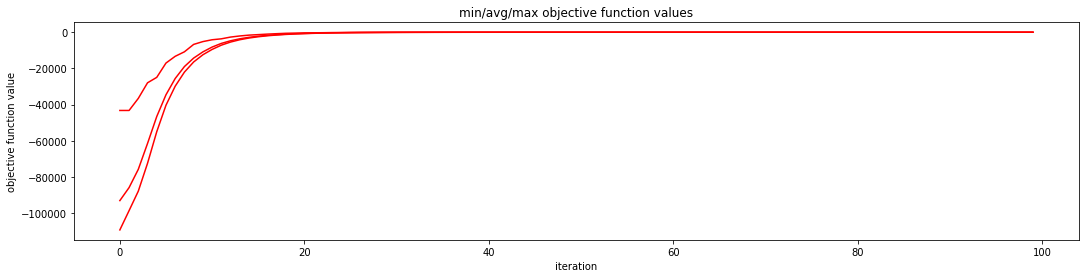

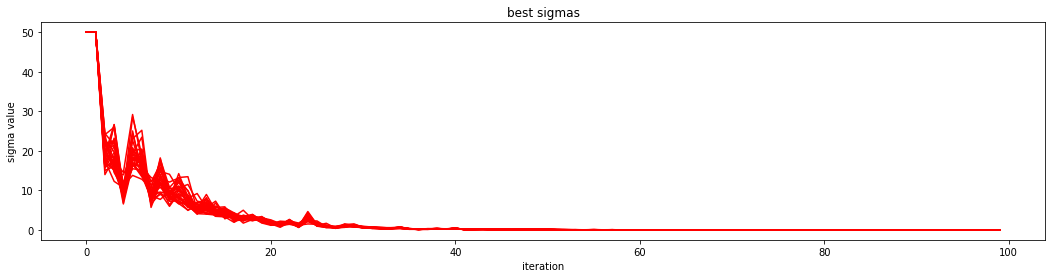

In [19]:
d = 30
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

## Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -102988.29177946, mean score = -162857.07430903.
Iteration 0010 : best score = -20492.86048545, mean score = -30722.45186516.
Iteration 0020 : best score = -4178.90275873, mean score = -6122.07098295.
Iteration 0030 : best score = -1370.00845810, mean score = -1711.14873614.
Iteration 0040 : best score = -616.36300425, mean score = -825.84147802.
Iteration 0050 : best score = -502.48785527, mean score = -622.99675317.
Iteration 0060 : best score = -456.13973718, mean score = -554.18155743.
Iteration 0070 : best score = -434.88186270, mean score = -521.71317940.
Iteration 0080 : best score = -343.37690939, mean score = -424.16707904.
Iteration 0090 : best score = -195.46322590, mean score = -213.87431784.
Iteration 0100 : best score = -159.01889846, mean score = -164.15401954.
Iteration 0110 : best score = -138.40531899, mean score = -143.50290242.
Iteration 0120 : best score = -120.21934892, mean score = -124.50750688.
Iteration 0130 : best score = -114.24

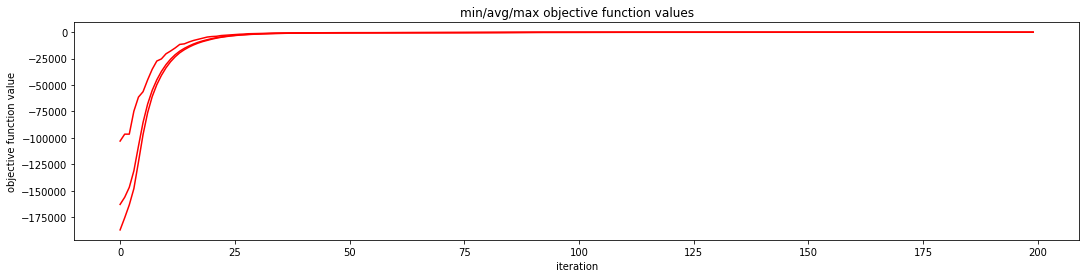

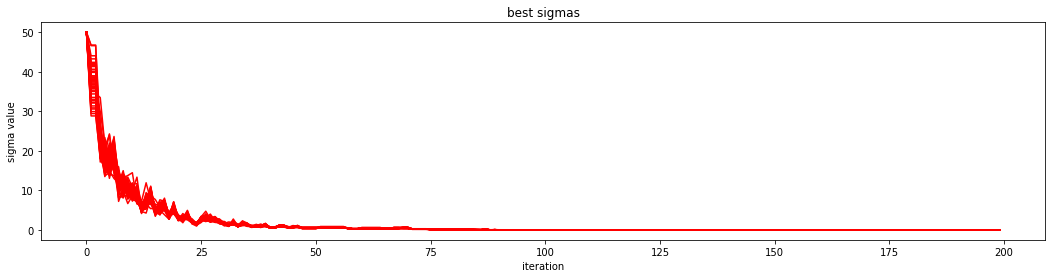

In [62]:
d = 50
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

## Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.76325826, mean score = -7.64760564.
Iteration 0010 : best score = -0.64713188, mean score = -1.04932022.
Iteration 0020 : best score = -0.18429130, mean score = -0.71105667.
Iteration 0030 : best score = -0.00064718, mean score = -0.00323825.
Iteration 0040 : best score = -0.00000138, mean score = -0.00000825.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000002.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


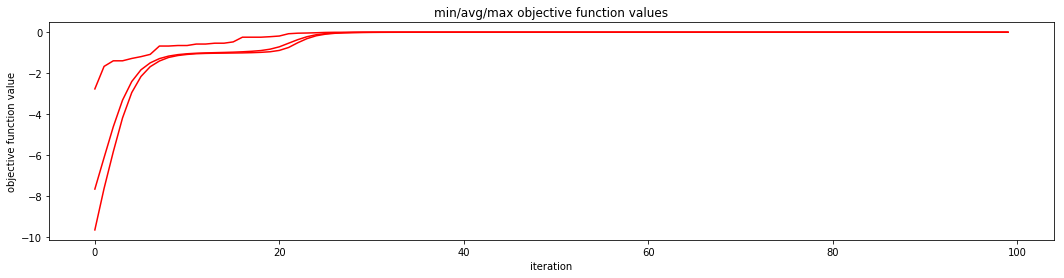

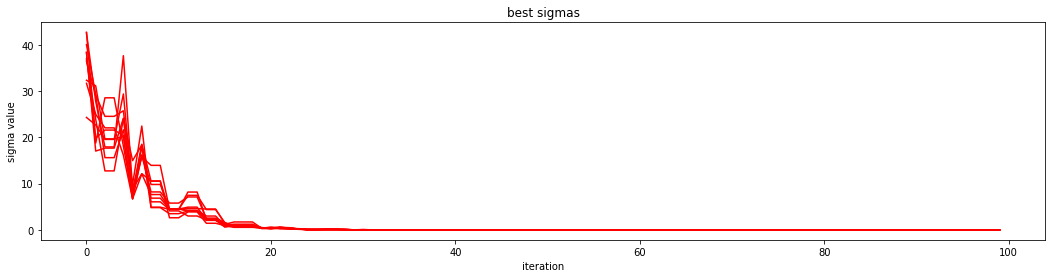

In [32]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

# Zad1

In [35]:
def zad1_wrapper(D, N, children, T, K, sigma, objective_function):
    for d in D:
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function, d, N, T, children, 2, sigma, K/np.sqrt(2*d), K/np.sqrt(2*np.sqrt(d)), 10)

        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-')
        plt.plot(history_objective_values[:, 1], 'r-')
        plt.plot(history_objective_values[:, 2], 'r-')
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values, D = %d' % d)
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()

### Rastrigin 

Iteration 0000 : best score = -5065.46751331, mean score = -26696.27042588.
Iteration 0010 : best score = -92.12201049, mean score = -309.24771508.
Iteration 0020 : best score = -27.88242671, mean score = -73.90527058.
Iteration 0030 : best score = -27.47688311, mean score = -60.85751344.
Iteration 0040 : best score = -22.05546193, mean score = -55.32920404.
Iteration 0050 : best score = -6.82395401, mean score = -50.00858822.
Iteration 0060 : best score = -0.22484742, mean score = -1.33801115.
Iteration 0070 : best score = -0.00026670, mean score = -0.00285836.
Iteration 0080 : best score = -0.00000041, mean score = -0.00000548.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0110 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0120 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0130 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0140 : best 

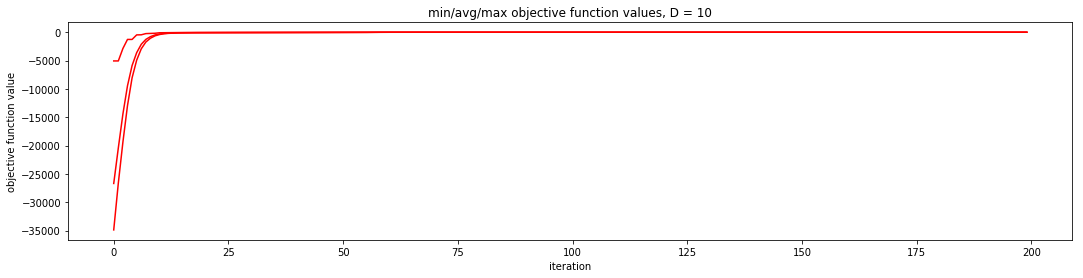

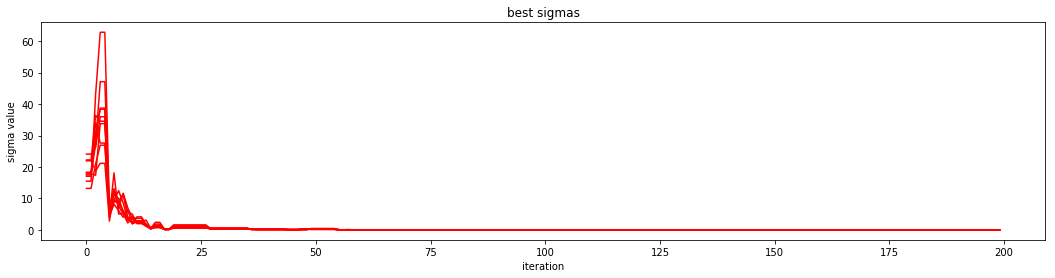

Iteration 0000 : best score = -17231.92023917, mean score = -59624.36567179.
Iteration 0010 : best score = -1015.22886618, mean score = -2282.72124799.
Iteration 0020 : best score = -136.26645306, mean score = -235.28820519.
Iteration 0030 : best score = -98.60591584, mean score = -170.50783326.
Iteration 0040 : best score = -78.89355577, mean score = -154.71911812.
Iteration 0050 : best score = -78.89355577, mean score = -145.81335580.
Iteration 0060 : best score = -74.51056174, mean score = -136.13447423.
Iteration 0070 : best score = -23.80819307, mean score = -37.11346204.
Iteration 0080 : best score = -15.36942329, mean score = -16.08426826.
Iteration 0090 : best score = -14.93027377, mean score = -14.94251255.
Iteration 0100 : best score = -14.92453493, mean score = -14.92473856.
Iteration 0110 : best score = -14.92438894, mean score = -14.92439351.
Iteration 0120 : best score = -14.92438594, mean score = -14.92438605.
Iteration 0130 : best score = -14.92438586, mean score = -14.

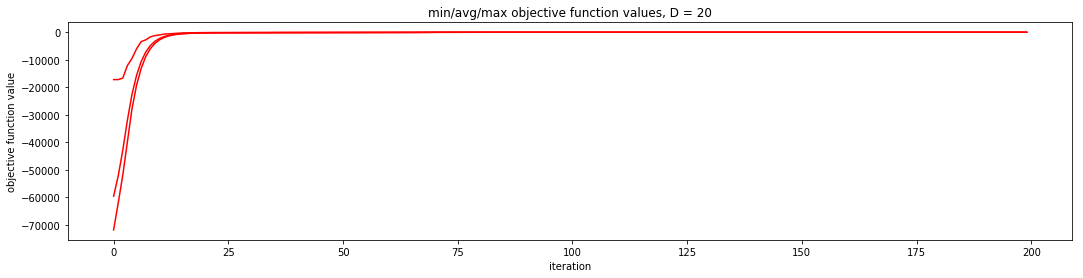

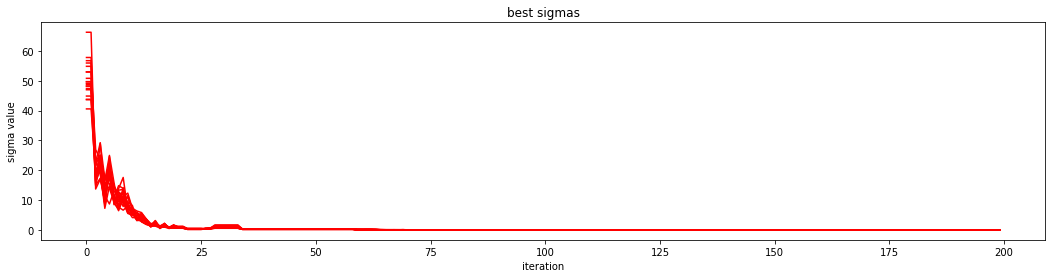

Iteration 0000 : best score = -105641.00121466, mean score = -160558.74558632.
Iteration 0010 : best score = -17674.22619522, mean score = -29380.44179471.
Iteration 0020 : best score = -4026.52463808, mean score = -5635.62715580.
Iteration 0030 : best score = -1207.27393436, mean score = -1568.88232042.
Iteration 0040 : best score = -636.79239691, mean score = -782.35846431.
Iteration 0050 : best score = -482.90184112, mean score = -600.49719912.
Iteration 0060 : best score = -434.15748206, mean score = -545.41664943.
Iteration 0070 : best score = -415.96571872, mean score = -515.14096137.
Iteration 0080 : best score = -270.84063529, mean score = -350.89450685.
Iteration 0090 : best score = -165.98101598, mean score = -182.51014808.
Iteration 0100 : best score = -129.72860857, mean score = -134.95000613.
Iteration 0110 : best score = -121.35068433, mean score = -122.45880088.
Iteration 0120 : best score = -119.84027277, mean score = -120.05650837.
Iteration 0130 : best score = -119.50

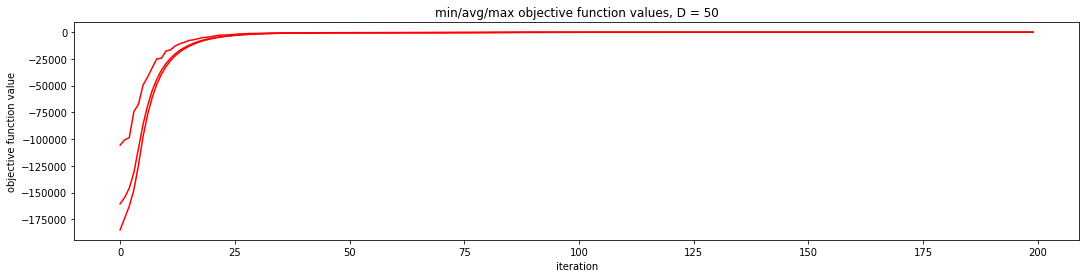

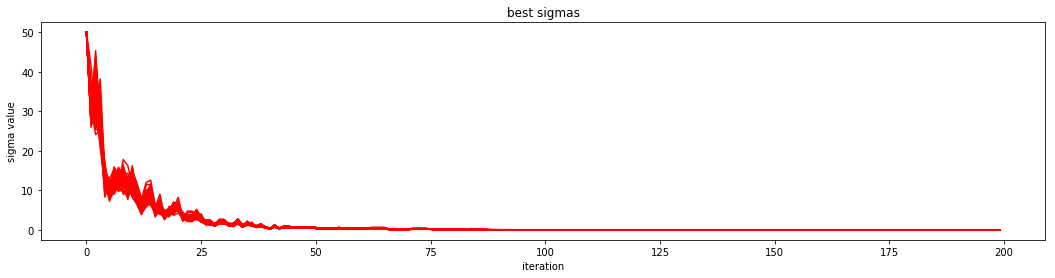

Iteration 0000 : best score = -240288.75043853, mean score = -330752.40524786.
Iteration 0010 : best score = -103401.26723042, mean score = -130662.83682867.
Iteration 0020 : best score = -38296.83721769, mean score = -47343.28491638.
Iteration 0030 : best score = -18050.40382562, mean score = -21292.33956728.
Iteration 0040 : best score = -9085.13884705, mean score = -10696.31213094.
Iteration 0050 : best score = -4849.95193831, mean score = -5721.59843192.
Iteration 0060 : best score = -2940.94754648, mean score = -3338.50089094.
Iteration 0070 : best score = -1969.03760238, mean score = -2274.79629965.
Iteration 0080 : best score = -1583.82124166, mean score = -1775.33783614.
Iteration 0090 : best score = -1359.74337425, mean score = -1542.62634819.
Iteration 0100 : best score = -1245.85738437, mean score = -1413.30494526.
Iteration 0110 : best score = -1182.14801528, mean score = -1327.60511165.
Iteration 0120 : best score = -1124.20995936, mean score = -1265.74635091.
Iteration 01

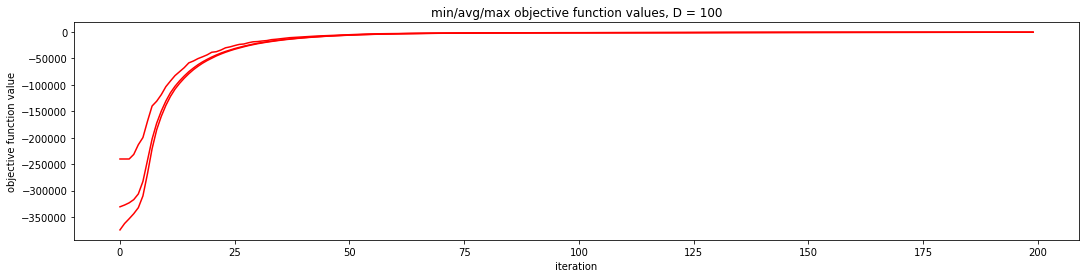

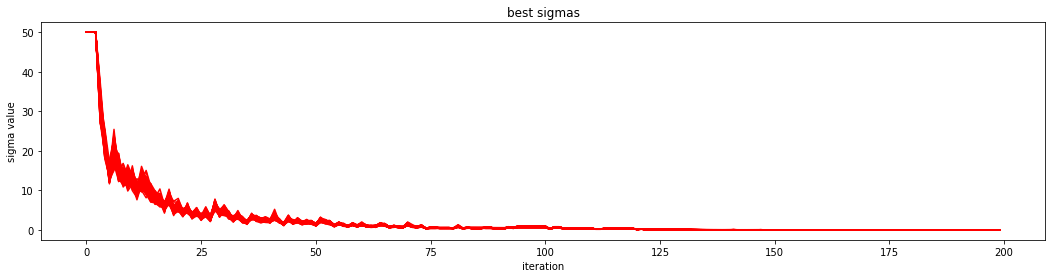

In [70]:
D = [10, 20, 50, 100]
N = 2000
children = 4000
T = 200
K =1.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F6)

### Sphere

Iteration 0000 : best score = -7017.15930130, mean score = -26363.40176174.
Iteration 0010 : best score = -27.82677080, mean score = -244.82804667.
Iteration 0020 : best score = -0.11459841, mean score = -0.71070799.
Iteration 0030 : best score = -0.00021942, mean score = -0.00139718.
Iteration 0040 : best score = -0.00000047, mean score = -0.00000277.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


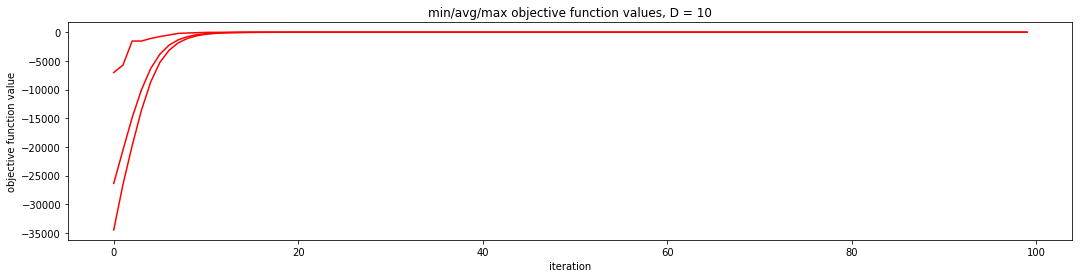

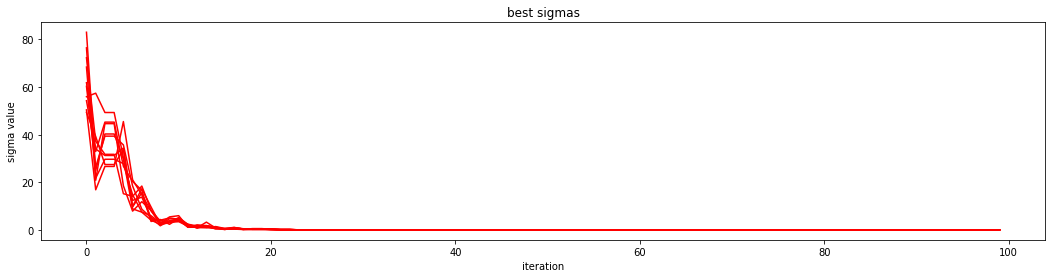

Iteration 0000 : best score = -25863.83425327, mean score = -59111.59267623.
Iteration 0010 : best score = -780.92551180, mean score = -2183.92473505.
Iteration 0020 : best score = -17.02983999, mean score = -46.79627104.
Iteration 0030 : best score = -0.41984351, mean score = -1.20787350.
Iteration 0040 : best score = -0.01218843, mean score = -0.02964300.
Iteration 0050 : best score = -0.00035552, mean score = -0.00084281.
Iteration 0060 : best score = -0.00000738, mean score = -0.00002149.
Iteration 0070 : best score = -0.00000024, mean score = -0.00000058.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


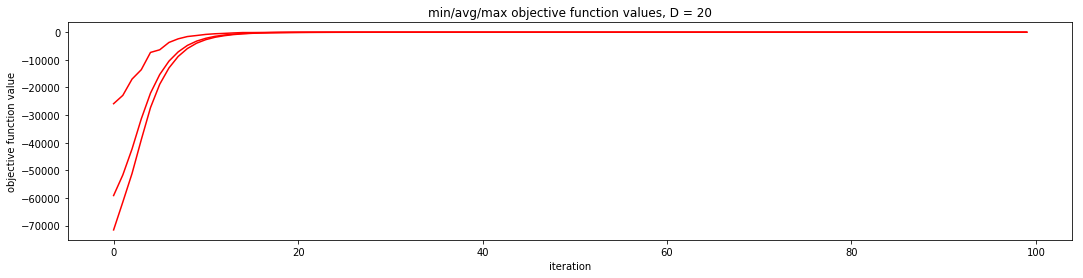

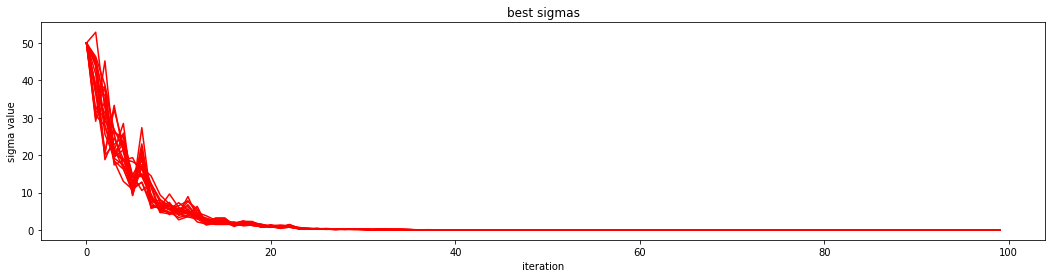

Iteration 0000 : best score = -100857.20514688, mean score = -160564.77971209.
Iteration 0010 : best score = -19676.87713538, mean score = -28931.97820888.
Iteration 0020 : best score = -3905.23043323, mean score = -5424.64798658.
Iteration 0030 : best score = -879.86718131, mean score = -1233.70050343.
Iteration 0040 : best score = -218.30044882, mean score = -289.78147744.
Iteration 0050 : best score = -46.05823633, mean score = -67.89106412.
Iteration 0060 : best score = -11.13396970, mean score = -15.46057289.
Iteration 0070 : best score = -2.59617390, mean score = -3.73082394.
Iteration 0080 : best score = -0.68568731, mean score = -0.97893768.
Iteration 0090 : best score = -0.17986653, mean score = -0.24584991.


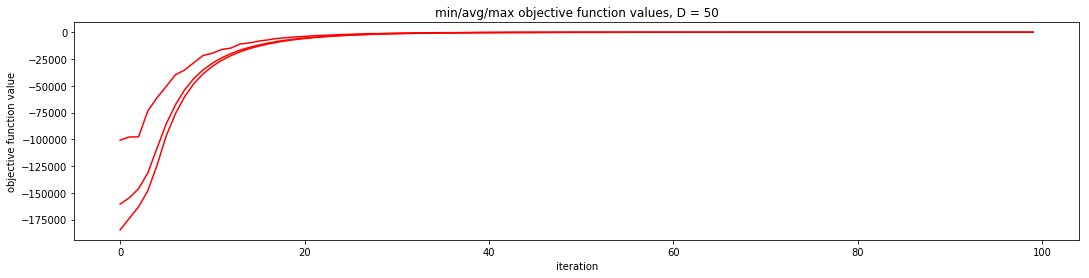

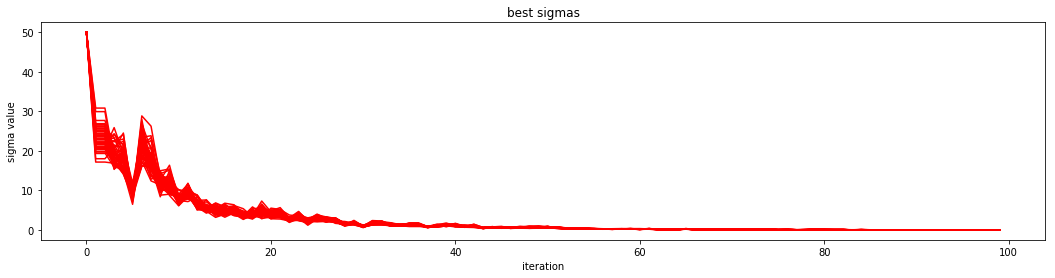

Iteration 0000 : best score = -236166.62495776, mean score = -330217.67345153.
Iteration 0010 : best score = -97478.36350257, mean score = -134820.71666659.
Iteration 0020 : best score = -41873.30006465, mean score = -48942.65104556.
Iteration 0030 : best score = -19801.88555562, mean score = -22647.78578952.
Iteration 0040 : best score = -9240.59272429, mean score = -11062.59998750.
Iteration 0050 : best score = -4595.85629406, mean score = -5395.41676538.
Iteration 0060 : best score = -2271.83715797, mean score = -2678.09321097.
Iteration 0070 : best score = -1130.88197539, mean score = -1311.07316774.
Iteration 0080 : best score = -516.38858630, mean score = -629.74871448.
Iteration 0090 : best score = -267.85452206, mean score = -310.86723524.


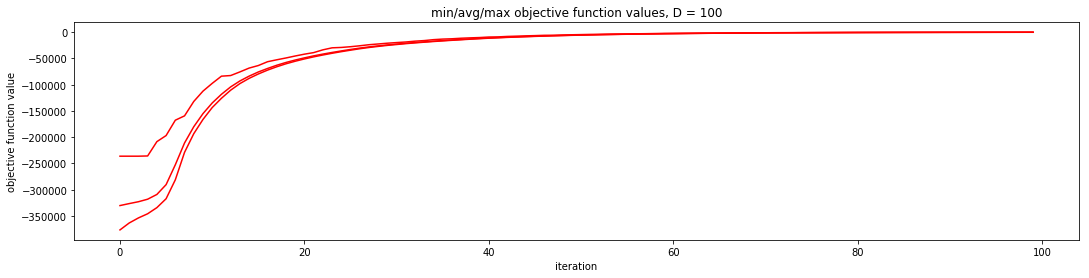

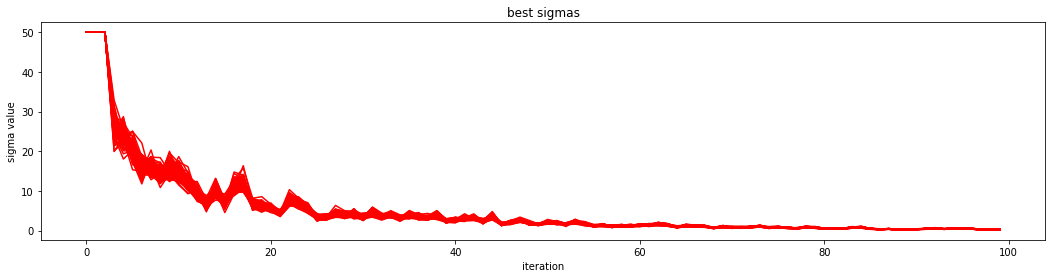

In [37]:
D = [10, 20, 50, 100]
N = 2000
children = 4000
T = 100
K =1.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F1)

### Schwefel

Iteration 0000 : best score = -3279.71330915, mean score = -3969.11194145.
Iteration 0010 : best score = -2331.02759775, mean score = -3383.64420791.
Iteration 0020 : best score = -2034.60446998, mean score = -3153.99690628.
Iteration 0030 : best score = -1931.03451515, mean score = -3024.37704573.
Iteration 0040 : best score = -1684.89311086, mean score = -2929.12399528.
Iteration 0050 : best score = -1684.89311086, mean score = -2862.49926943.
Iteration 0060 : best score = -1684.89311086, mean score = -2789.42056273.
Iteration 0070 : best score = -1684.89311086, mean score = -2724.58761433.
Iteration 0080 : best score = -1625.45988905, mean score = -2664.07324509.
Iteration 0090 : best score = -1625.45988905, mean score = -2596.88502782.


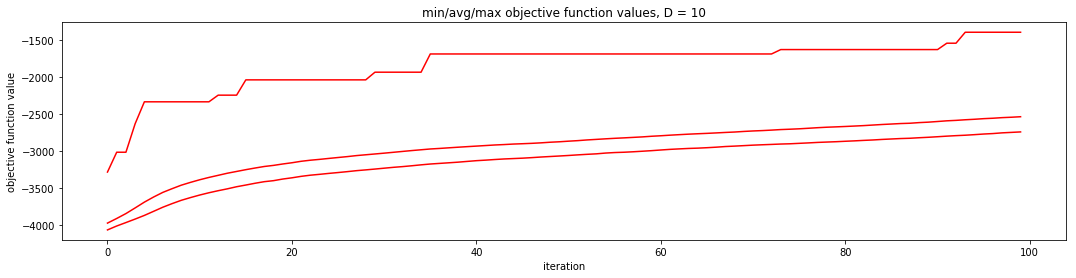

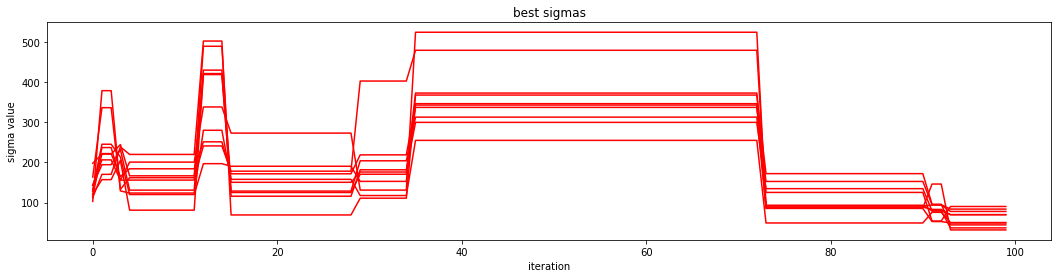

Iteration 0000 : best score = -7058.27360894, mean score = -8030.20804955.
Iteration 0010 : best score = -5869.87641769, mean score = -7365.24195275.
Iteration 0020 : best score = -5869.87641769, mean score = -7062.02072509.
Iteration 0030 : best score = -5065.86352256, mean score = -6898.99712632.
Iteration 0040 : best score = -5065.86352256, mean score = -6793.79546562.
Iteration 0050 : best score = -5065.86352256, mean score = -6708.86450150.
Iteration 0060 : best score = -5065.86352256, mean score = -6644.23207547.
Iteration 0070 : best score = -5065.86352256, mean score = -6588.96715734.
Iteration 0080 : best score = -5065.86352256, mean score = -6534.84310106.
Iteration 0090 : best score = -5065.86352256, mean score = -6493.78231217.


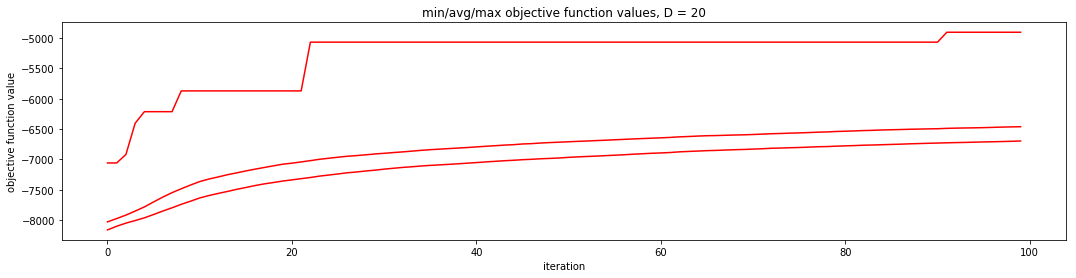

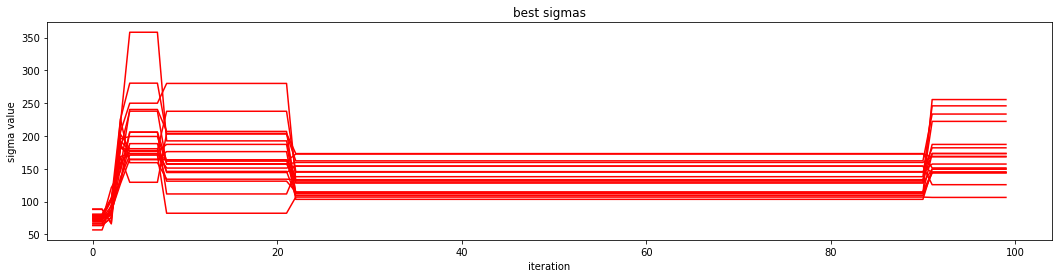

Iteration 0000 : best score = -19369.52753954, mean score = -20251.07797725.
Iteration 0010 : best score = -17928.24700262, mean score = -19754.51668899.
Iteration 0020 : best score = -16934.76157012, mean score = -19265.36420579.
Iteration 0030 : best score = -16934.76157012, mean score = -19007.46440485.
Iteration 0040 : best score = -16934.76157012, mean score = -18831.18204110.
Iteration 0050 : best score = -16810.84666015, mean score = -18708.60521854.
Iteration 0060 : best score = -16810.84666015, mean score = -18611.26542457.
Iteration 0070 : best score = -16731.57452854, mean score = -18540.58423975.
Iteration 0080 : best score = -16602.43442732, mean score = -18475.26018265.
Iteration 0090 : best score = -16602.43442732, mean score = -18423.09749866.


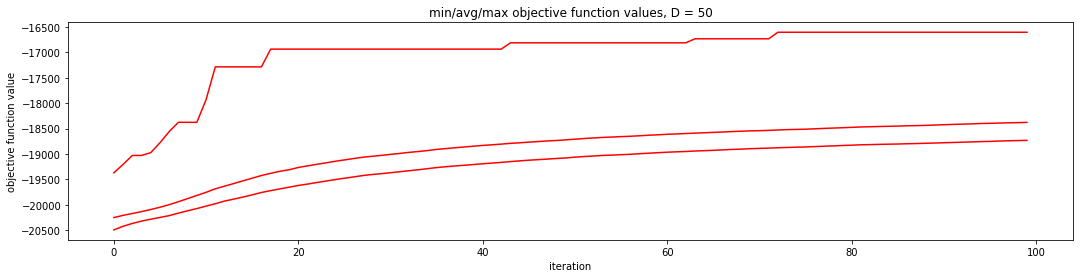

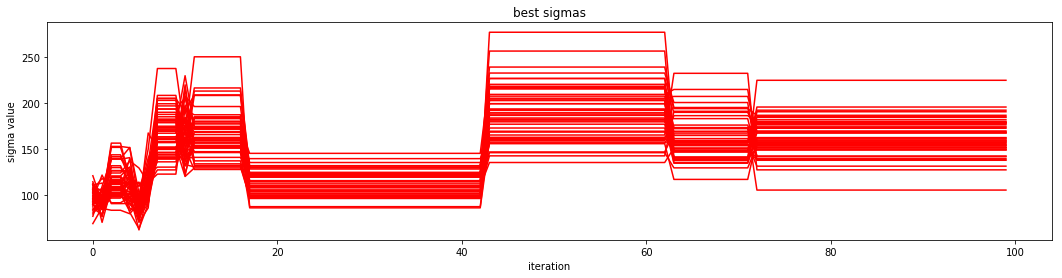

Iteration 0000 : best score = -39597.22030113, mean score = -40605.36988913.
Iteration 0010 : best score = -39118.27344463, mean score = -40360.99351934.
Iteration 0020 : best score = -36831.67246452, mean score = -37155.56547578.
Iteration 0030 : best score = -36038.44862993, mean score = -36129.31767776.
Iteration 0040 : best score = -35765.36787224, mean score = -35804.65032308.
Iteration 0050 : best score = -35647.10813183, mean score = -35664.67208857.
Iteration 0060 : best score = -35588.60403739, mean score = -35597.85878333.
Iteration 0070 : best score = -35561.23536339, mean score = -35565.93717676.
Iteration 0080 : best score = -35547.66343844, mean score = -35549.85215818.
Iteration 0090 : best score = -35540.68580770, mean score = -35542.00320627.


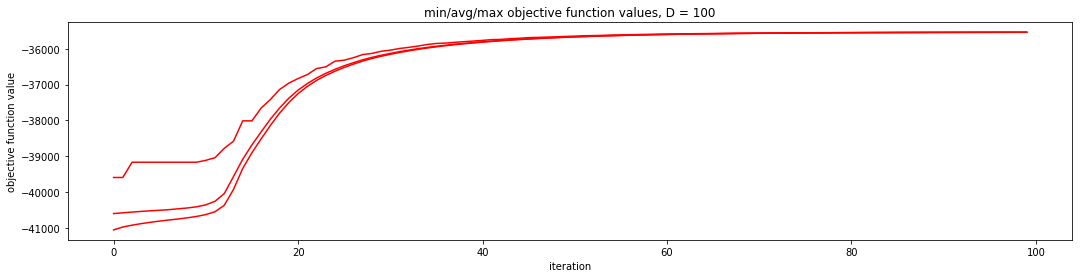

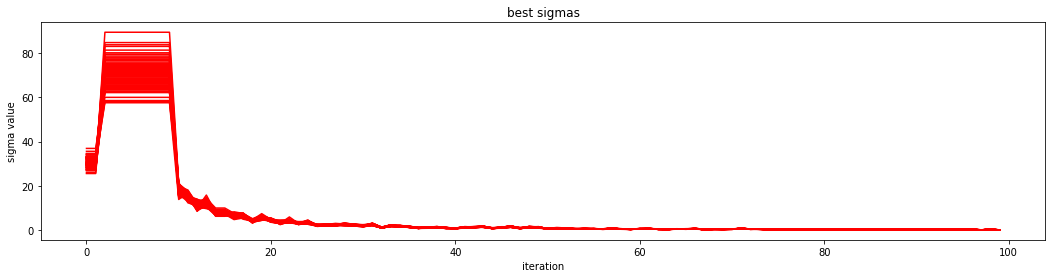

In [44]:
D = [10, 20, 50, 100]
N = 2000
children = 4000
T = 100
K =1.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F7)

### Griewank

Iteration 0000 : best score = -1.82351077, mean score = -7.48448617.
Iteration 0010 : best score = -0.36575257, mean score = -1.05027329.
Iteration 0020 : best score = -0.06682032, mean score = -0.56079841.
Iteration 0030 : best score = -0.00847575, mean score = -0.01321475.
Iteration 0040 : best score = -0.00740107, mean score = -0.00742466.
Iteration 0050 : best score = -0.00739606, mean score = -0.00739616.
Iteration 0060 : best score = -0.00739604, mean score = -0.00739604.
Iteration 0070 : best score = -0.00739604, mean score = -0.00739604.
Iteration 0080 : best score = -0.00739604, mean score = -0.00739604.
Iteration 0090 : best score = -0.00739604, mean score = -0.00739604.


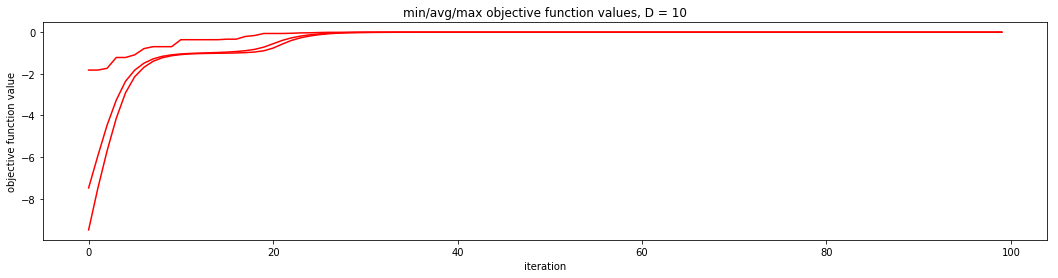

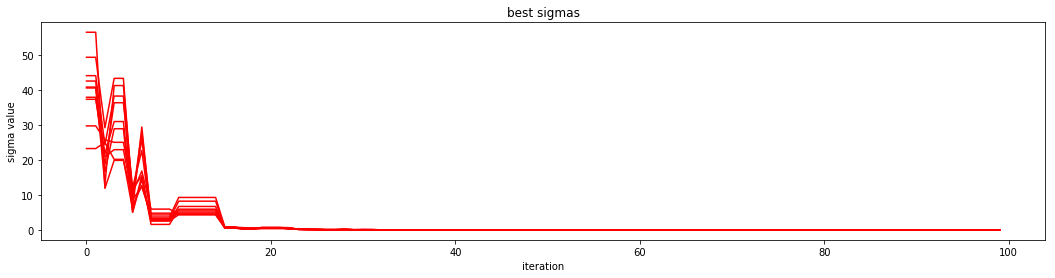

Iteration 0000 : best score = -7.79538467, mean score = -16.10008551.
Iteration 0010 : best score = -1.23948390, mean score = -1.59035623.
Iteration 0020 : best score = -0.61839269, mean score = -0.99861399.
Iteration 0030 : best score = -0.07292918, mean score = -0.13006911.
Iteration 0040 : best score = -0.01615566, mean score = -0.02215485.
Iteration 0050 : best score = -0.00838519, mean score = -0.00936346.
Iteration 0060 : best score = -0.00750658, mean score = -0.00764456.
Iteration 0070 : best score = -0.00740417, mean score = -0.00741528.
Iteration 0080 : best score = -0.00739662, mean score = -0.00739733.
Iteration 0090 : best score = -0.00739607, mean score = -0.00739611.


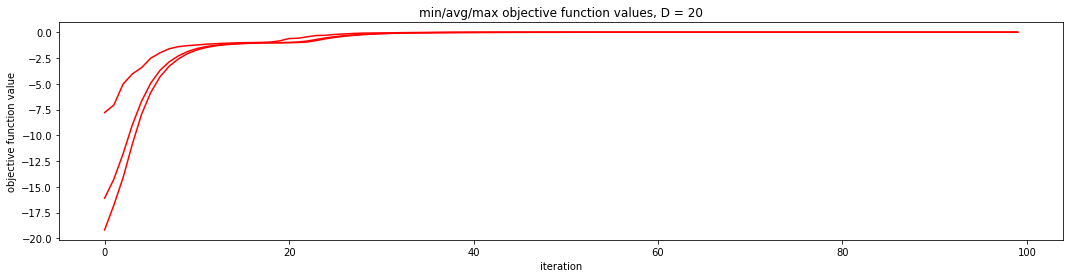

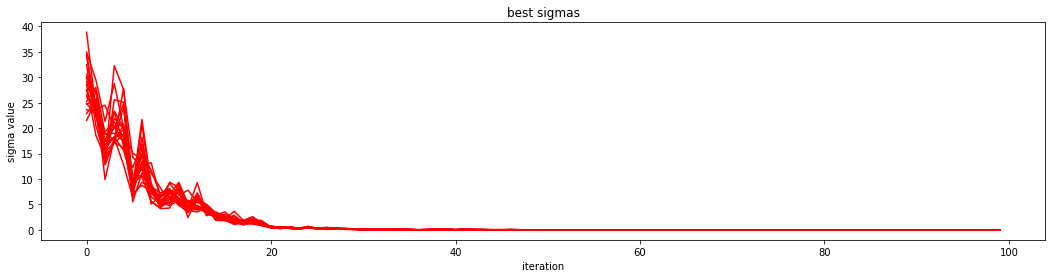

Iteration 0000 : best score = -23.50626096, mean score = -41.19019855.
Iteration 0010 : best score = -6.11099430, mean score = -8.42620816.
Iteration 0020 : best score = -1.97506202, mean score = -2.39986515.
Iteration 0030 : best score = -1.23735574, mean score = -1.32937864.
Iteration 0040 : best score = -1.05633436, mean score = -1.08349557.
Iteration 0050 : best score = -0.80601429, mean score = -0.91899753.
Iteration 0060 : best score = -0.35994259, mean score = -0.44298838.
Iteration 0070 : best score = -0.18838706, mean score = -0.22577699.
Iteration 0080 : best score = -0.09754049, mean score = -0.11825047.
Iteration 0090 : best score = -0.05208921, mean score = -0.06279912.


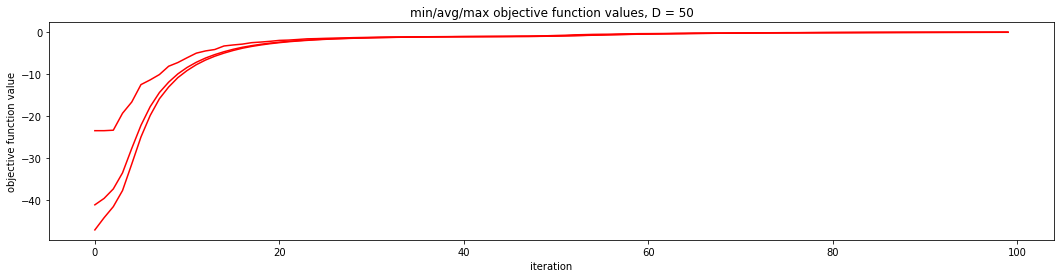

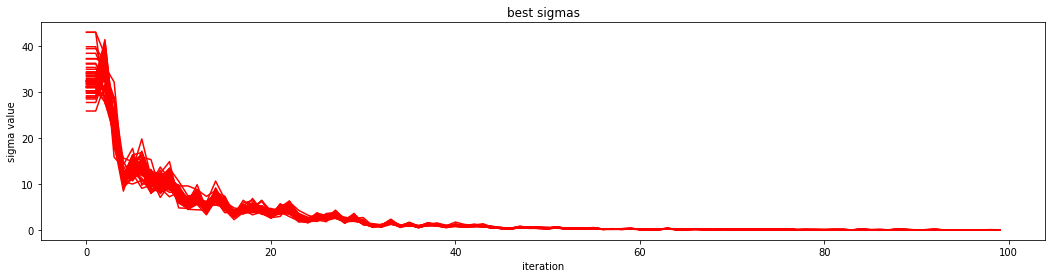

Iteration 0000 : best score = -60.20104565, mean score = -83.44219178.
Iteration 0010 : best score = -24.58229742, mean score = -32.65109793.
Iteration 0020 : best score = -10.48516925, mean score = -12.64390758.
Iteration 0030 : best score = -5.63411871, mean score = -6.45015623.
Iteration 0040 : best score = -3.25045143, mean score = -3.67173111.
Iteration 0050 : best score = -2.11285168, mean score = -2.30008341.
Iteration 0060 : best score = -1.54583641, mean score = -1.63886018.
Iteration 0070 : best score = -1.26702137, mean score = -1.31254767.
Iteration 0080 : best score = -1.13409130, mean score = -1.15649364.
Iteration 0090 : best score = -1.05345450, mean score = -1.07607118.


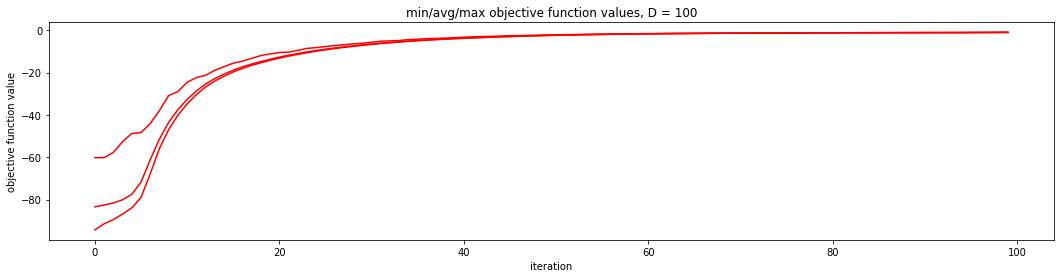

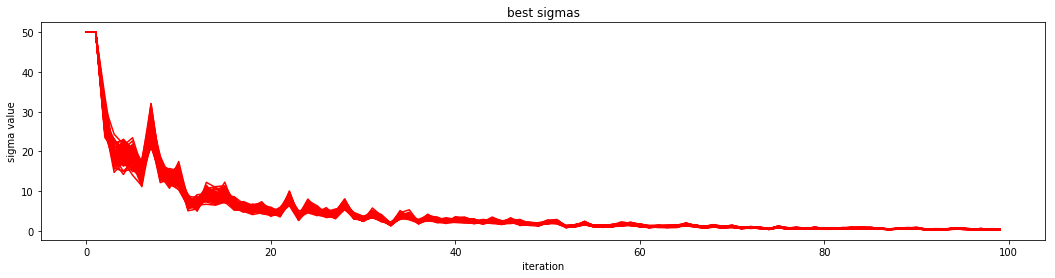

In [45]:
D = [10, 20, 50, 100]
N = 2000
children = 4000
T = 100
K =1.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F8)

## Parameter testing based on Rastrigin, d = 50

#### Big learning coefficient

Iteration 0000 : best score = -99690.92968975, mean score = -145495.68809026.
Iteration 0010 : best score = -60376.93213794, mean score = -65872.01260886.
Iteration 0020 : best score = -37540.93819235, mean score = -42565.98090964.
Iteration 0030 : best score = -25450.96377117, mean score = -28293.28830471.
Iteration 0040 : best score = -16030.55238327, mean score = -17615.13502663.
Iteration 0050 : best score = -10124.01391384, mean score = -11469.90035632.
Iteration 0060 : best score = -6734.17134507, mean score = -7568.22913062.
Iteration 0070 : best score = -4428.83244684, mean score = -5084.33866898.
Iteration 0080 : best score = -3063.99059957, mean score = -3416.11564469.
Iteration 0090 : best score = -2289.59029960, mean score = -2498.09227458.


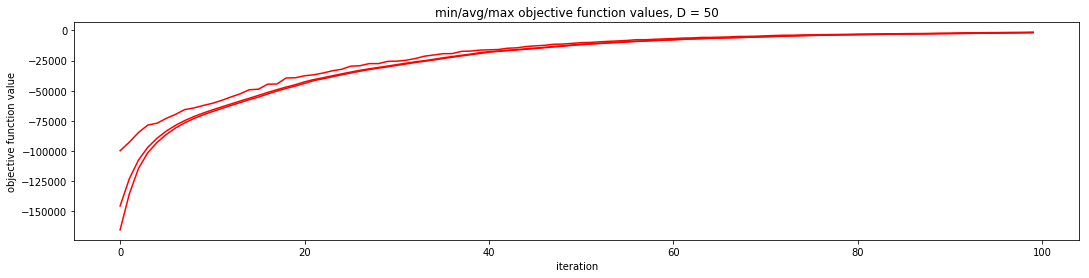

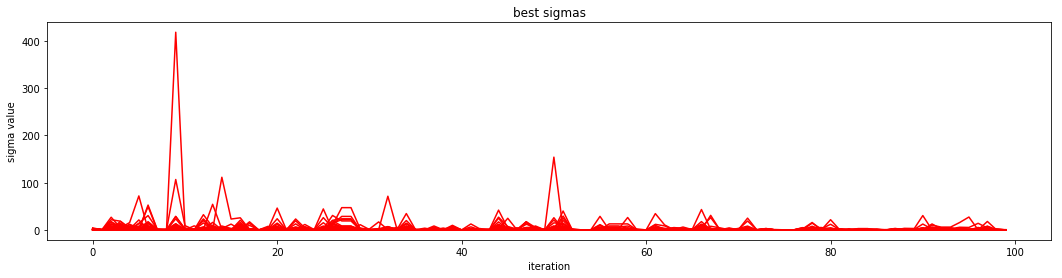

In [52]:
D = [50]
N = 2000
children = 4000
T = 100
K =10.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F6)

Probably got stuck in local extreme

#### Small learning coefficient

Iteration 0000 : best score = -98498.49959865, mean score = -163973.24275656.
Iteration 0010 : best score = -81051.90178528, mean score = -143848.04846001.
Iteration 0020 : best score = -66951.72509588, mean score = -115619.96186617.
Iteration 0030 : best score = -50166.28337726, mean score = -97149.71623415.
Iteration 0040 : best score = -50166.28337726, mean score = -87137.82087031.
Iteration 0050 : best score = -50166.28337726, mean score = -80387.79774234.
Iteration 0060 : best score = -48095.52326867, mean score = -75490.41590436.
Iteration 0070 : best score = -42889.17272016, mean score = -71716.82501795.
Iteration 0080 : best score = -42889.17272016, mean score = -68551.24499096.
Iteration 0090 : best score = -42889.17272016, mean score = -66035.24461768.
Iteration 0100 : best score = -38856.76271199, mean score = -63555.55681188.
Iteration 0110 : best score = -38856.76271199, mean score = -61435.22535629.
Iteration 0120 : best score = -38656.46708774, mean score = -59494.867868

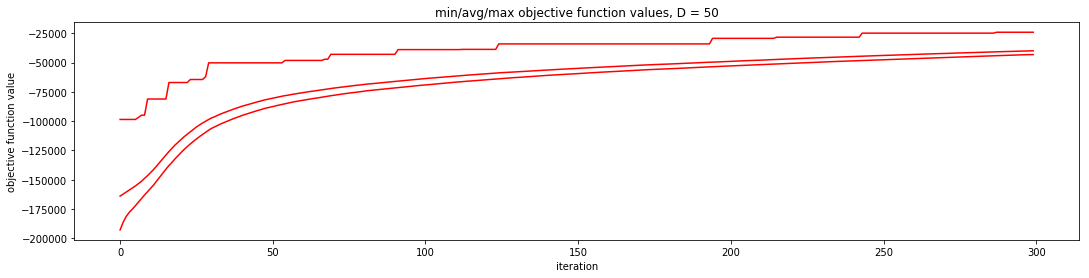

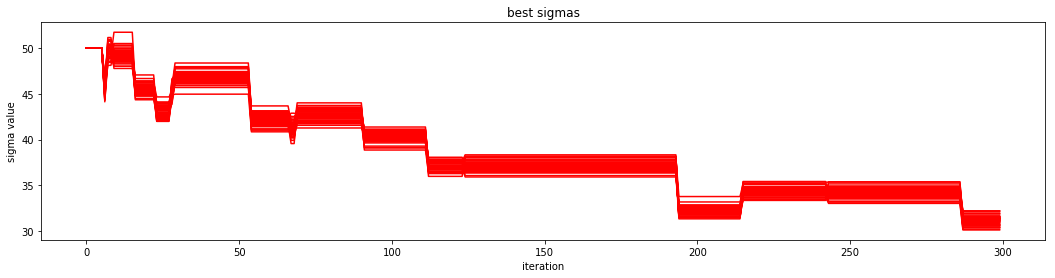

In [55]:
D = [50]
N = 2000
children = 4000
T = 300
K =0.1
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F6)

#### small population, many offsprings

Iteration 0000 : best score = -97694.99589224, mean score = -111961.62921264.
Iteration 0010 : best score = -26339.71363325, mean score = -27807.07141884.
Iteration 0020 : best score = -11146.75744818, mean score = -12125.52344230.
Iteration 0030 : best score = -5105.82769246, mean score = -5331.80968717.
Iteration 0040 : best score = -2380.76127638, mean score = -2494.92437316.
Iteration 0050 : best score = -1620.85549823, mean score = -1645.80116073.
Iteration 0060 : best score = -1455.42808865, mean score = -1469.37262781.
Iteration 0070 : best score = -1423.74578965, mean score = -1424.14011897.
Iteration 0080 : best score = -1381.53499459, mean score = -1383.04436509.
Iteration 0090 : best score = -919.71648950, mean score = -941.94282934.
Iteration 0100 : best score = -873.67231189, mean score = -874.14458283.
Iteration 0110 : best score = -867.10437451, mean score = -867.29089399.
Iteration 0120 : best score = -858.36516213, mean score = -859.33013514.
Iteration 0130 : best scor

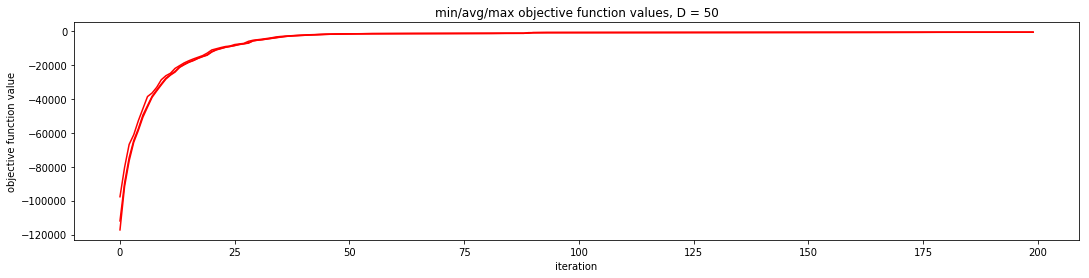

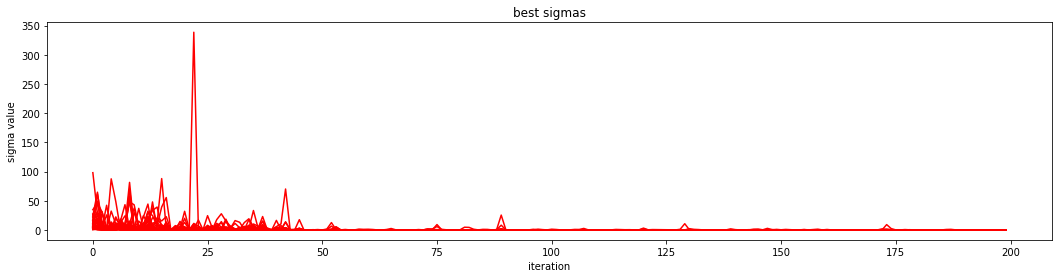

In [61]:
D = [50]
N = 100
children = 4000
T = 200
K =10.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F6)

Too small diversity, but works suprisingly well

#### Big population, small number of offsprings

Iteration 0000 : best score = -102613.25820612, mean score = -166537.35494926.
Iteration 0010 : best score = -89194.73184997, mean score = -156776.66639412.
Iteration 0020 : best score = -59962.10460563, mean score = -127217.03484555.
Iteration 0030 : best score = -39664.94227262, mean score = -70734.04944320.
Iteration 0040 : best score = -25307.19763020, mean score = -41720.00245352.
Iteration 0050 : best score = -16049.16622752, mean score = -26515.77818216.
Iteration 0060 : best score = -12216.77923460, mean score = -18122.35399395.
Iteration 0070 : best score = -8704.69446911, mean score = -12661.09303074.
Iteration 0080 : best score = -7120.43126067, mean score = -9290.03583311.
Iteration 0090 : best score = -5099.18295638, mean score = -7003.47280626.
Iteration 0100 : best score = -4040.69155384, mean score = -5338.00526884.
Iteration 0110 : best score = -2864.47822469, mean score = -4109.15757589.
Iteration 0120 : best score = -2330.59227831, mean score = -3159.44520588.
Iterat

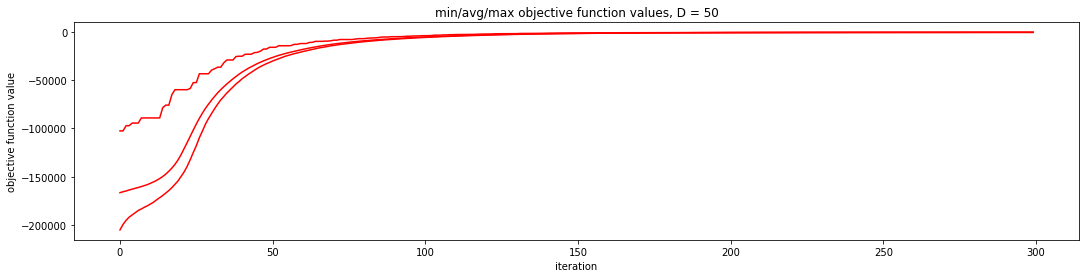

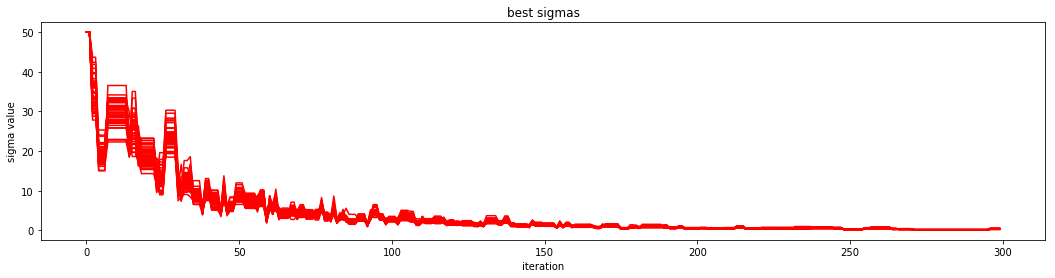

In [592]:
D = [50]
N = 2000
children = 444
T = 300
K =1.0
sigma = 50.

zad1_wrapper(D, N, children, T, K, sigma, objective_function_F6)

changes between generations are smaller (not so many individuals from populations are removed). The algorithm converges slower and can achieve better results.

## Zad3

### Testing modified sphere functions

In [458]:
def zad3_wrapper(d, N, children, T, K, sigma, objective_function):
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function, d, N, T, children, 2, sigma, K/np.sqrt(2*d), K/np.sqrt(2*np.sqrt(d)), 10)

        plt.figure(figsize=(18, 4))
        plt.plot(np.exp(history_objective_values[:, 2]), 'r-')
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('exp(max objective function values), D = %d' % d)
        plt.show()

Iteration 0000 : best score = -562.98718013, mean score = -6178.09705769.
Iteration 0010 : best score = -1.93082203, mean score = -9.53187607.
Iteration 0020 : best score = -0.01162896, mean score = -0.12488796.
Iteration 0030 : best score = -0.00002956, mean score = -0.00012813.
Iteration 0040 : best score = -0.00000001, mean score = -0.00000012.


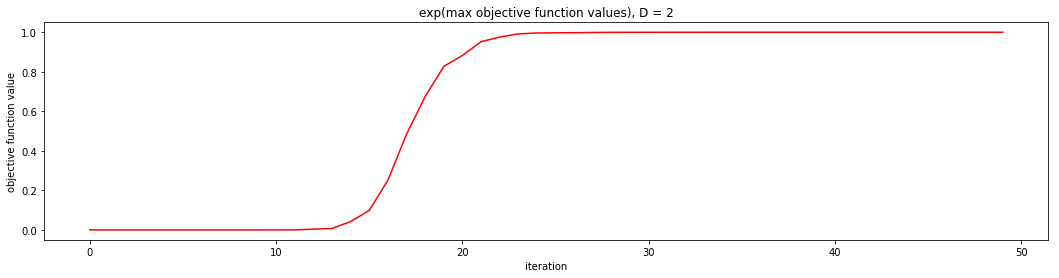

In [468]:
d = 2
N = 10
children = 20
T = 50
K =1.0
sigma = 10.

zad3_wrapper(d, N, children, T, K, sigma, objective_function_F1a)

Iteration 0000 : best score = -5186.42168088, mean score = -215062.93388799.
Iteration 0010 : best score = -47.69660039, mean score = -118.63751118.
Iteration 0020 : best score = -0.19762050, mean score = -1.64768282.
Iteration 0030 : best score = -0.00045020, mean score = -0.00236200.
Iteration 0040 : best score = -0.00000249, mean score = -0.00001089.


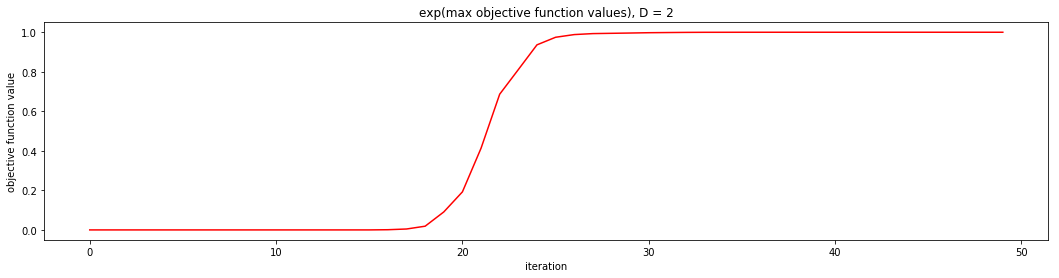

In [469]:
zad3_wrapper(d, N, children, T, K, sigma, objective_function_F1b)

Iteration 0000 : best score = -1177.62657343, mean score = -1855.37732918.
Iteration 0010 : best score = -0.94846657, mean score = -3.32915306.
Iteration 0020 : best score = -0.00733631, mean score = -0.03899745.
Iteration 0030 : best score = -0.00011333, mean score = -0.00052812.
Iteration 0040 : best score = -0.00000085, mean score = -0.00000347.


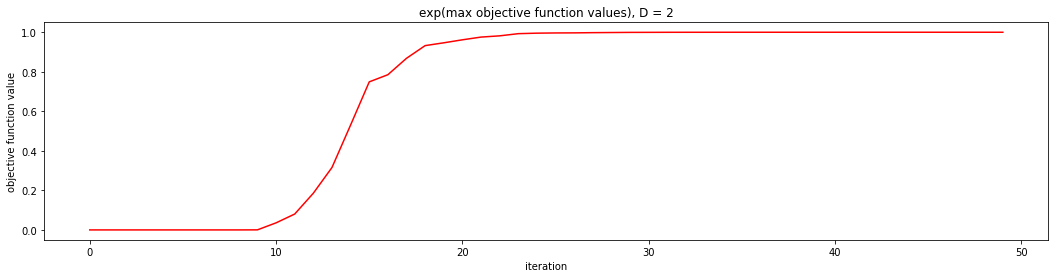

In [470]:
zad3_wrapper(d, N, children, T, K, sigma, objective_function_F1c)

## different mutation models

In [563]:
def es_mut(objective_function, mutation_function, chromosome_length, sigmas_length,  population_size, number_of_iterations, 
           number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, sigmas_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, sigmas_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, sigmas_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, sigmas_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = mutation_function(children_population_solutions[i], children_population_sigmas[i])

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [574]:
def zad3b_wrapper(d, N, children, T, K, sigma, objective_function, mutation_function, sigmas_length):
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas=es_mut(
        objective_function, mutation_function, d, sigmas_length, N, T, children, 2, sigma, K/np.sqrt(2*d), K/np.sqrt(2*np.sqrt(d)), 10)

        plt.figure(figsize=(18, 4))
        plt.plot(np.exp(history_objective_values[:, 2]), 'r-')
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('exp(max objective function values), D = %d' % d)
        plt.show()

### one sigma for all 

In [575]:
def single_sigma_mutation(gene, sigmas):
    sigma = sigmas[0]
    gene = gene + np.random.normal(0, sigma, len(gene))
    return gene

Iteration 0000 : best score = -167.07780399, mean score = -10340.15886976.
Iteration 0010 : best score = -0.12656722, mean score = -18.65678984.
Iteration 0020 : best score = -0.00054818, mean score = -0.04102156.
Iteration 0030 : best score = -0.00000034, mean score = -0.00002893.
Iteration 0040 : best score = -0.00000000, mean score = -0.00000004.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


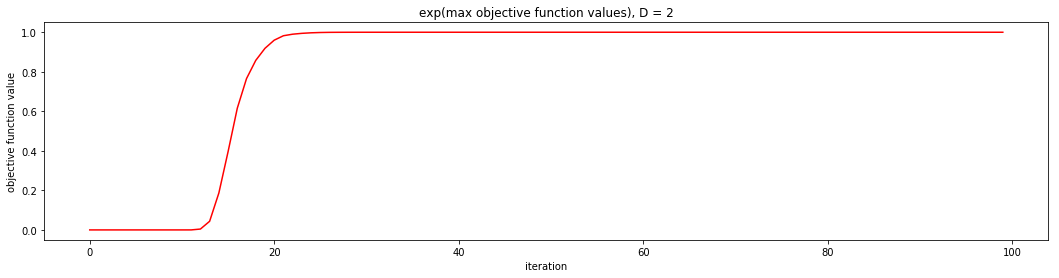

Iteration 0000 : best score = -1645.26349342, mean score = -266129.00286257.
Iteration 0010 : best score = -104.68315187, mean score = -955.78032665.
Iteration 0020 : best score = -8.62411382, mean score = -139.74761809.
Iteration 0030 : best score = -3.45809385, mean score = -26.09695466.
Iteration 0040 : best score = -1.29461371, mean score = -7.13410230.
Iteration 0050 : best score = -0.49537318, mean score = -2.05816624.
Iteration 0060 : best score = -0.01024174, mean score = -0.30538448.
Iteration 0070 : best score = -0.00023588, mean score = -0.01524900.
Iteration 0080 : best score = -0.00014717, mean score = -0.00256534.
Iteration 0090 : best score = -0.00003753, mean score = -0.00028717.


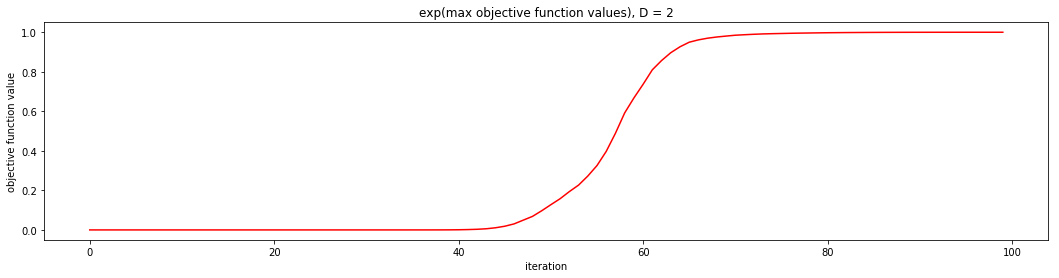

Iteration 0000 : best score = -24.53198194, mean score = -2108.52960802.
Iteration 0010 : best score = -0.01802714, mean score = -6.87180603.
Iteration 0020 : best score = -0.00010810, mean score = -0.01381023.
Iteration 0030 : best score = -0.00000002, mean score = -0.00000794.
Iteration 0040 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


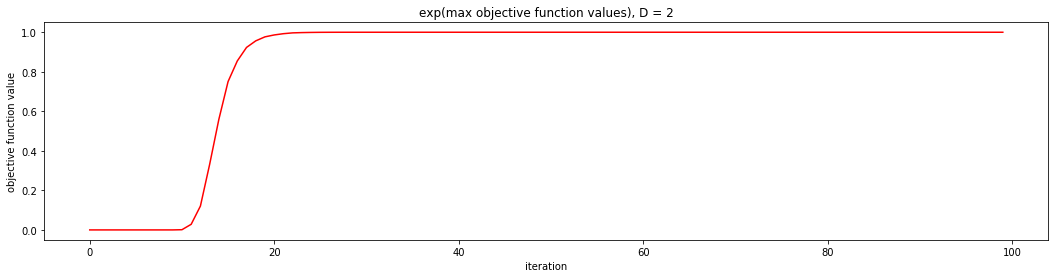

In [581]:
d = 2
N = 200
children = 200
T = 100
K =1.0
sigma = 10.

zad3b_wrapper(d, N, children, T, K, sigma, objective_function_F1a, single_sigma_mutation, 1)
zad3b_wrapper(d, N, children, T, K, sigma, objective_function_F1b, single_sigma_mutation, 1)
zad3b_wrapper(d, N, children, T, K, sigma, objective_function_F1c, single_sigma_mutation, 1)

In [588]:
def covariance_mutation(gene, sigmas):
    cov = sigmas.reshape((2, 2))
    return gene + np.dot(np.random.randn(1, 2), np.linalg.cholesky(S).T)

Iteration 0000 : best score = -11.92246459, mean score = -8413.43695986.
Iteration 0010 : best score = -3.86244820, mean score = -15.22047247.
Iteration 0020 : best score = -0.01817060, mean score = -0.96573692.
Iteration 0030 : best score = -0.00070427, mean score = -0.11031142.
Iteration 0040 : best score = -0.00070427, mean score = -0.04463036.
Iteration 0050 : best score = -0.00008707, mean score = -0.02870118.
Iteration 0060 : best score = -0.00008707, mean score = -0.02239741.
Iteration 0070 : best score = -0.00008707, mean score = -0.01829378.
Iteration 0080 : best score = -0.00008707, mean score = -0.01491456.
Iteration 0090 : best score = -0.00008707, mean score = -0.01215767.


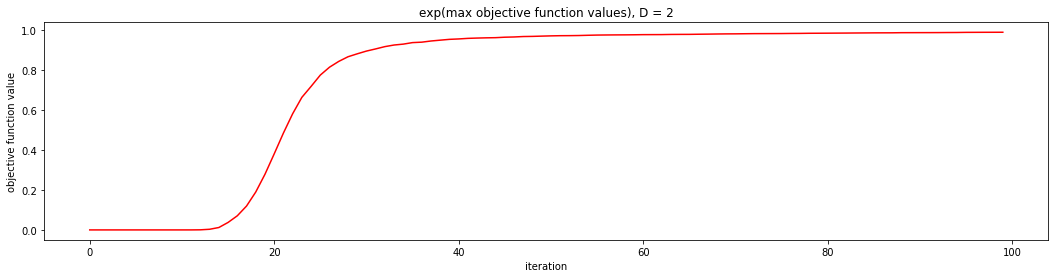

Iteration 0000 : best score = -691.22525674, mean score = -360380.97464614.
Iteration 0010 : best score = -168.90439225, mean score = -569.25824666.
Iteration 0020 : best score = -159.42145989, mean score = -202.70646222.
Iteration 0030 : best score = -136.23229460, mean score = -163.37022012.
Iteration 0040 : best score = -107.34325258, mean score = -136.42121455.
Iteration 0050 : best score = -83.55442540, mean score = -112.35362567.
Iteration 0060 : best score = -73.92962827, mean score = -91.34765436.
Iteration 0070 : best score = -49.26866450, mean score = -74.12858953.
Iteration 0080 : best score = -41.02584102, mean score = -56.97789652.
Iteration 0090 : best score = -27.08983031, mean score = -41.39228113.


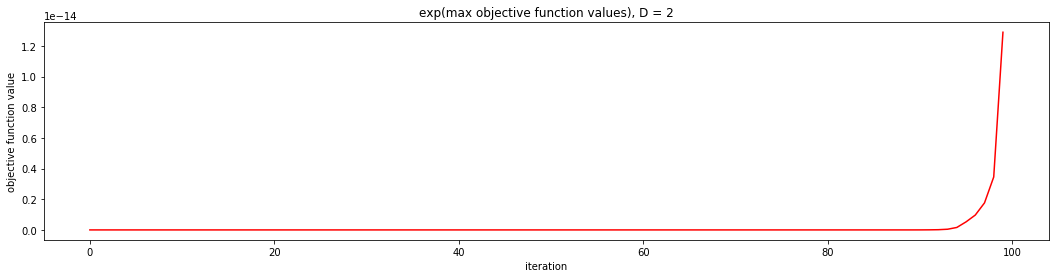

Iteration 0000 : best score = -102.91413517, mean score = -1513.98342868.
Iteration 0010 : best score = -58.04081771, mean score = -72.83293690.
Iteration 0020 : best score = -16.56325157, mean score = -25.27987219.
Iteration 0030 : best score = -1.41871030, mean score = -3.63262963.
Iteration 0040 : best score = -0.00162674, mean score = -0.07280556.
Iteration 0050 : best score = -0.00005629, mean score = -0.01809644.
Iteration 0060 : best score = -0.00005629, mean score = -0.01212799.
Iteration 0070 : best score = -0.00005629, mean score = -0.00810549.
Iteration 0080 : best score = -0.00000519, mean score = -0.00647693.
Iteration 0090 : best score = -0.00000519, mean score = -0.00497985.


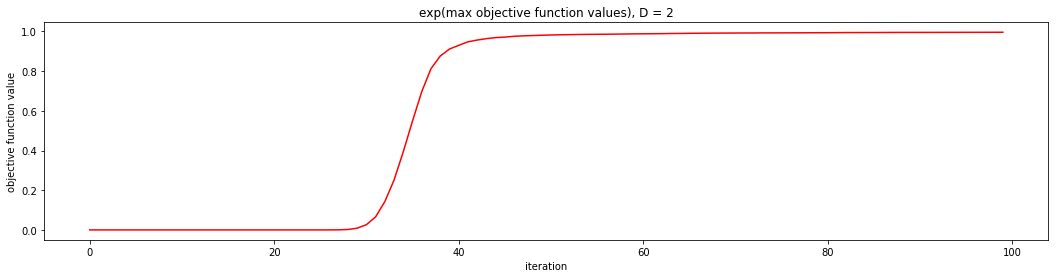

In [591]:
T = 100
zad3b_wrapper(d, N, children, T, K, sigma, objective_function_F1a, covariance_mutation, 4)
zad3b_wrapper(d, N, children, T, K, sigma, objective_function_F1b, covariance_mutation, 4)
zad3b_wrapper(d, N, children, T, K, sigma, objective_function_F1c, covariance_mutation, 4)